# Fraud Detection EDA

## Imports and Global Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Geo-Viz
import folium
import geopandas as gpd
import geoplot as gplt
#import descartes
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

## Load Data

In [2]:
# Import the data prep pipeline
import sys
sys.path.append('..')
from src.data.preprocessing import load_fraud_data, run_data_prep_pipeline

# Load and process the data
raw_data = load_fraud_data("train_data")
df = run_data_prep_pipeline(raw_data)

# Breakdown
print(f"Loaded {len(raw_data)} raw records.")
print(f"After data prep pipeline: {len(df)} records.")

# Feature stats
print(f"\nNumber of features: {len(df.columns)}")
print(f"Number of fraud records: {len(df[df['is_fraud'] == 'Fraud'])}")
print(f"Number of non-fraud records: {len(df[df['is_fraud'] == 'Not Fraud'])}")

# Calculate fraud rate
fraud_rate = len(df[df['is_fraud'] == 'Fraud']) / len(df) * 100
print(f"Fraud rate: {fraud_rate:.2f}%")

# Display first few rows
df.head()

Loaded 8602 raw records.
After data prep pipeline: 8602 records.

Number of features: 52
Number of fraud records: 822
Number of non-fraud records: 7780
Fraud rate: 9.56%


,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,is_fraud,num_previous_payouts,previous_payouts_total,num_ticket_types,num_tickets_available,total_ticket_value,avg_ticket_cost,known_payee_name,known_venue_name,known_payout_type,total_empty_values
0,2007-02-12 05:00:00,2164,6,GB,GBP,-1.0,Producer’s note \r\n\r\nThe Amazon rainforest ...,lidf.co.uk,2007-02-01 12:21:08,2007-02-07 05:00:00,NaT,2007-02-07 03:30:00,0,0.0,0,-1.0,0,1,The Z-oe: Nomads of the Amazon (Q&A with Matt ...,57,0,0,47146,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,5,1,279,2006-04-28 21:39:29,3,24 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,0,0.0,2,120,540.0,4.5,0,1,0,17
1,2007-03-05 06:00:00,5967,6,GB,GBP,-1.0,"Golden Globe, San Francisco International Film...",lidf.co.uk,2007-02-11 19:36:10,2007-02-28 06:00:00,NaT,2007-02-28 03:30:00,0,0.0,0,-1.0,0,1,In the Land of the Deaf – a film by Nicolas Ph...,136,0,0,48129,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,289,2006-04-28 21:39:29,3,31 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,24,1808.5,2,150,675.0,4.5,0,1,0,15
2,2007-03-12 04:00:00,1639,6,GB,GBP,-1.0,Winner: The Rory Peck Award for Features \r\n\...,lidf.co.uk,2007-02-11 19:49:04,2007-03-07 05:00:00,NaT,2007-03-07 03:30:00,0,0.0,0,-1.0,0,1,At the Epicentre (Q&A with Ruhi Hamid),38,0,0,48130,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,23,1,289,2006-04-28 21:39:29,3,31 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,0,0.0,2,150,675.0,4.5,0,1,0,17
3,2008-04-05 01:00:00,3266,0,GB,GBP,-1.0,LIDF Sunday at the Roxy - Part 1|A Little Bit ...,lidf.co.uk,2008-03-14 22:02:18,2008-03-31 01:00:00,NaT,2008-03-30 22:30:00,0,0.0,0,0.0,1,1,LIDF Sunday at the Roxy - Part 1,32,0,0,104008,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,686,2006-04-28 21:39:29,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,Fraud,24,1808.5,1,80,400.0,5.0,0,1,0,15
4,2008-04-05 06:00:00,2264,0,GB,GBP,-1.0,LIDF Sunday at the Roxy - Part 2|The Heart (El...,lidf.co.uk,2008-03-14 22:10:34,2008-03-31 06:00:00,NaT,2008-03-31 01:30:00,0,0.0,0,0.0,1,1,LIDF Sunday at the Roxy - Part 2,32,0,0,104011,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,686,2006-04-28 21:39:29,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,Fraud,0,0.0,1,80,400.0,5.0,0,1,0,17


## Basic EDA

In [3]:
print("Available columns:", sorted(df.columns.tolist()))

Available columns: ['approx_payout_date', 'avg_ticket_cost', 'body_length', 'channels', 'country', 'currency', 'delivery_method', 'description', 'email_domain', 'event_created', 'event_end', 'event_published', 'event_start', 'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo', 'is_fraud', 'known_payee_name', 'known_payout_type', 'known_venue_name', 'listed', 'name', 'name_length', 'num_order', 'num_payouts', 'num_previous_payouts', 'num_ticket_types', 'num_tickets_available', 'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter', 'payee_name', 'payout_type', 'previous_payouts_total', 'sale_duration', 'sale_duration2', 'show_map', 'total_empty_values', 'total_ticket_value', 'user_age', 'user_created', 'user_type', 'venue_address', 'venue_country', 'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state']


In [4]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name_length,num_order,num_payouts,object_id,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,num_previous_payouts,previous_payouts_total,num_ticket_types,num_tickets_available,total_ticket_value,avg_ticket_cost,known_payee_name,known_venue_name,known_payout_type,total_empty_values
count,8602,8602.000000,8602.000000,8602.000000,8602,8602,8553,8602,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602,8602.000000,8602.000000,8602.000000,8602.000000,8.602000e+03,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,2012-05-09 07:06:13.831666944,3775.116020,6.722274,0.453732,2012-03-05 13:18:58.710765056,2012-05-04 07:06:04.624506112,2012-01-24 12:08:35.711095808,2012-04-29 18:07:29.790746112,0.134504,2753.604569,0.083585,-0.157870,0.836433,0.863288,42.947919,30.378052,33.060567,3.212918e+06,7.111718,4.054522,50.028365,55.079865,0.813997,355.423622,2011-03-16 03:07:55.852011264,2.763543,33.438328,-58.913971,90.271565,9.115831e+04,2.743432,1.010828e+04,1.373506e+06,96.104661,0.248779,0.827249,0.970472,9.023483
min,2007-02-12 05:00:00,0.000000,0.000000,-1.000000,2007-02-01 12:21:08,2007-02-07 05:00:00,1970-01-01 00:00:00,2007-02-07 03:30:00,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.714600e+04,-1.000000,-1.000000,-1094.000000,-1094.000000,0.000000,0.000000,2002-01-16 19:47:22,1.000000,-43.538506,-159.390183,0.000000,0.000000e+00,0.000000,0.000000e+00,-8.000000e+00,-0.080000,0.000000,0.000000,0.000000,1.000000
25%,2011-11-18 07:56:15,819.250000,5.000000,0.000000,2011-09-25 15:16:12,2011-11-13 07:56:15,2011-09-27 16:56:27,2011-11-11 20:00:00,0.000000,134.500000,0.000000,-1.000000,1.000000,1.000000,27.000000,3.000000,0.000000,2.163406e+06,0.000000,0.000000,16.000000,17.000000,1.000000,21.000000,2010-07-02 08:44:27,3.000000,32.965723,-96.767009,2.000000,9.800000e+02,1.000000,4.000000e+01,8.424550e+02,10.710519,0.000000,1.000000,1.000000,6.000000
50%,2012-06-05 16:35:00,2052.000000,8.000000,0.000000,2012-04-11 04:04:00.500000,2012-05-31 16:35:00,2012-04-12 22:04:08,2012-05-26 15:30:00,0.000000,481.365000,0.000000,0.000000,1.000000,1.000000,39.000000,8.000000,2.000000,3.258442e+06,0.000000,0.000000,33.000000,36.000000,1.000000,246.000000,2011-05-05 15:45:25,3.000000,39.521932,-78.601859,10.000000,7.495800e+03,2.000000,1.000000e+02,2.975910e+03,25.000000,0.000000,1.000000,1.000000,8.000000
75%,2012-11-09 23:45:00,4396.000000,8.000000,1.000000,2012-09-14 13:13:09.500000,2012-11-04 23:45:00,2012-09-18 03:11:15,2012-11-01 20:00:00,0.000000,1738.682500,0.000000,0.000000,1.000000,1.000000,54.000000,25.000000,13.000000,4.305124e+06,13.000000,10.000000,62.000000,67.000000,1.000000,555.000000,2012-02-06 13:53:30,3.000000,43.668398,-1.084873,44.000000,3.928848e+04,3.000000,3.200000e+02,1.181294e+04,67.033750,0.000000,1.000000,1.000000,11.000000
max,2018-04-11 23:00:00,65535.000000,13.000000,3.000000,2013-01-14 06:55:05,2018-04-06 23:00:00,2013-09-02 13:12:02,2014-06-18 17:00:00,1.000000,306293.930000,1.000000,1.000000,1.000000,1.000000,254.000000,2000.000000,1858.000000,5.213978e+06,91.000000,34.000000,980.000000,980.000000,1.000000,3689.000000,2013-01-14 05:12:34,103.000000,64.844022,176.101204,2048.000000,1.162565e+07,116.000000,3.050000e+07,7.500000e+09,15989.800000,1.000000,1.000000,1.000000,33.000000
std,NaN,5894.474619,3.544189,0.603066,NaN,NaN,NaN,NaN,0.341212,10339.764121,0.276781,0.649972,0.369903,0.343563,24.464360,102.643092,123.921345,1.239041e+06,11.284514,5.949653,62.400134,68.855453,0.389132,388.899308,NaN,1.504442,20.304498,62.200642,267.914560,4.101039e+05,4.0818

In [5]:
df.head()

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,is_fraud,num_previous_payouts,previous_payouts_total,num_ticket_types,num_tickets_available,total_ticket_value,avg_ticket_cost,known_payee_name,known_venue_name,known_payout_type,total_empty_values
0,2007-02-12 05:00:00,2164,6,GB,GBP,-1.0,Producer’s note \r\n\r\nThe Amazon rainforest ...,lidf.co.uk,2007-02-01 12:21:08,2007-02-07 05:00:00,NaT,2007-02-07 03:30:00,0,0.0,0,-1.0,0,1,The Z-oe: Nomads of the Amazon (Q&A with Matt ...,57,0,0,47146,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,5,1,279,2006-04-28 21:39:29,3,24 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,0,0.0,2,120,540.0,4.5,0,1,0,17
1,2007-03-05 06:00:00,5967,6,GB,GBP,-1.0,"Golden Globe, San Francisco International Film...",lidf.co.uk,2007-02-11 19:36:10,2007-02-28 06:00:00,NaT,2007-02-28 03:30:00,0,0.0,0,-1.0,0,1,In the Land of the Deaf – a film by Nicolas Ph...,136,0,0,48129,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,289,2006-04-28 21:39:29,3,31 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,24,1808.5,2,150,675.0,4.5,0,1,0,15
2,2007-03-12 04:00:00,1639,6,GB,GBP,-1.0,Winner: The Rory Peck Award for Features \r\n\...,lidf.co.uk,2007-02-11 19:49:04,2007-03-07 05:00:00,NaT,2007-03-07 03:30:00,0,0.0,0,-1.0,0,1,At the Epicentre (Q&A with Ruhi Hamid),38,0,0,48130,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,23,1,289,2006-04-28 21:39:29,3,31 Old Gloucester Street,GB,51.503116,-0.124740,October Gallery,Greater London,Fraud,0,0.0,2,150,675.0,4.5,0,1,0,17
3,2008-04-05 01:00:00,3266,0,GB,GBP,-1.0,LIDF Sunday at the Roxy - Part 1|A Little Bit ...,lidf.co.uk,2008-03-14 22:02:18,2008-03-31 01:00:00,NaT,2008-03-30 22:30:00,0,0.0,0,0.0,1,1,LIDF Sunday at the Roxy - Part 1,32,0,0,104008,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,686,2006-04-28 21:39:29,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,Fraud,24,1808.5,1,80,400.0,5.0,0,1,0,15
4,2008-04-05 06:00:00,2264,0,GB,GBP,-1.0,LIDF Sunday at the Roxy - Part 2|The Heart (El...,lidf.co.uk,2008-03-14 22:10:34,2008-03-31 06:00:00,NaT,2008-03-31 01:30:00,0,0.0,0,0.0,1,1,LIDF Sunday at the Roxy - Part 2,32,0,0,104011,PocketPictures runs the London International D...,0.0,PocketPictures,0.0,Unknown,Unknown,-1.0,16,1,686,2006-04-28 21:39:29,3,128-132 Borough High Street,GB,51.502767,-0.092569,Roxy Bar and Screen,Greater London,Fraud,0,0.0,1,80,400.0,5.0,0,1,0,17


## Map of Fraud by Country

In [6]:
all_location_data = df.loc[:, ["is_fraud", "country", "venue_latitude", "venue_longitude"]]
fraud_location_data = df.loc[df['is_fraud'] == "Fraud", ["is_fraud", "country",
                                                           "venue_latitude", "venue_longitude"]]
non_fraud_location_data = df.loc[df['is_fraud'] == "Not Fraud", ["is_fraud", "country",
                                                           "venue_latitude", "venue_longitude"]]

In [7]:
gdf = gpd.GeoDataFrame(
    all_location_data, geometry=gpd.points_from_xy(all_location_data.venue_longitude,
                                                   all_location_data.venue_latitude),
    crs="EPSG:4326")

In [8]:
gdf.head()

,is_fraud,country,venue_latitude,venue_longitude,geometry
0,Fraud,GB,51.503116,-0.124740,POINT (-0.12474 51.50312)
1,Fraud,GB,51.503116,-0.124740,POINT (-0.12474 51.50312)
2,Fraud,GB,51.503116,-0.124740,POINT (-0.12474 51.50312)
3,Fraud,GB,51.502767,-0.092569,POINT (-0.09257 51.50277)
4,Fraud,GB,51.502767,-0.092569,POINT (-0.09257 51.50277)


### Overall Fraud Rate

In [9]:
total_overall = gdf.shape[0]
fraud_overall = gdf[gdf['is_fraud'] == 'Fraud'].shape[0]
non_fraud_overall = gdf[gdf['is_fraud'] == 'Not Fraud'].shape[0]
fraud_rate_overall = (fraud_overall / total_overall) *100

In [10]:
print(f'There are {total_overall} events overall.')
print(f'{fraud_overall}({fraud_rate_overall:.1f}%) of these are fraudulent. {non_fraud_overall} are not.')

There are 8602 events overall.
822(9.6%) of these are fraudulent. 7780 are not.


### Location of Fraudulent Events

In [11]:
# Suppress the FutureWarning about deprecated dataset module
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=FutureWarning)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

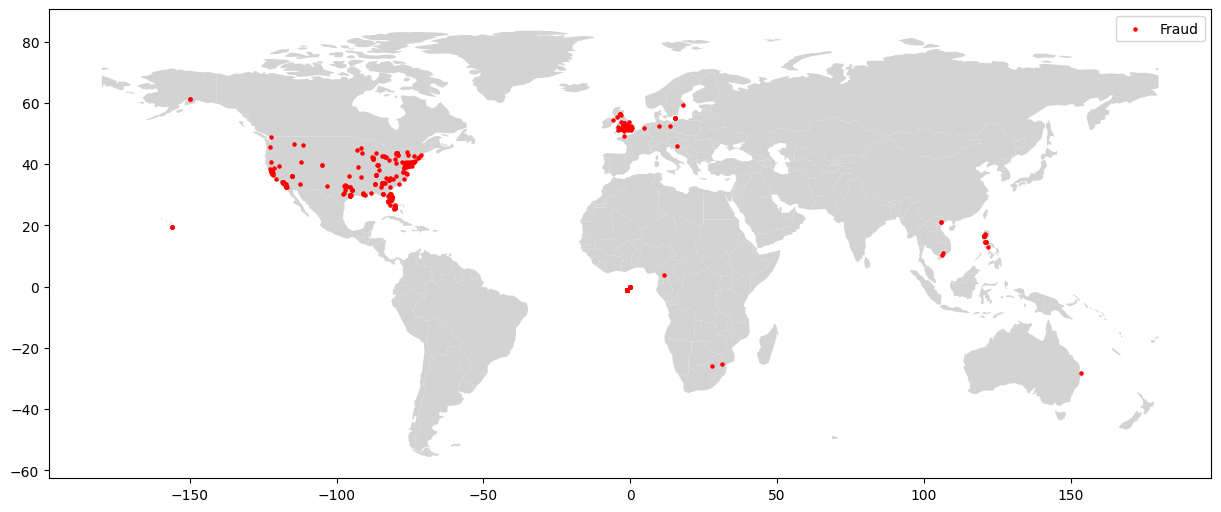

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='lightgrey')

gdf[gdf['is_fraud'] == "Fraud"].plot(ax=ax, markersize=5, color='red', label="Fraud")
#gdf[gdf['is_fraud'] == "Not Fraud"].plot(ax=ax, markersize=5, color='green', label="Not Fraud")

ax.legend()
plt.show()

### Events with Unknown Location

In [13]:
full_join = gpd.sjoin(gdf, world, how='left')

In [14]:
unknown_only = full_join[full_join['name'].isnull()]

In [15]:
total_unknown = unknown_only.shape[0]
fraud_unknown = unknown_only[unknown_only['is_fraud'] == 'Fraud'].shape[0]
non_fraud_unknown = unknown_only[unknown_only['is_fraud'] == 'Not Fraud'].shape[0]
fraud_rate_unknown = (fraud_unknown / total_unknown) *100

In [16]:
print(f'There are {total_unknown} events without a known location.')
print(f'{fraud_unknown}({fraud_rate_unknown:.1f}%) of these are fraudulent. {non_fraud_unknown} are not.')

There are 1043 events without a known location.
252(24.2%) of these are fraudulent. 791 are not.


### Mapping Fraudulent Events to Countries

In [17]:
polygon_df = gpd.sjoin(gdf, world, how='right')

In [18]:
polygon_df

,index_left,is_fraud,country,venue_latitude,venue_longitude,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,NaN,NaN,NaN,NaN,NaN,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,NaN,NaN,NaN,NaN,NaN,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,NaN,NaN,NaN,NaN,NaN,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,33.0,Not Fraud,CA,43.651256,-79.384368,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
3,46.0,Not Fraud,CA,49.248523,-123.108800,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
...,...,...,...,...,...,...,...,...,...,...,...
172,NaN,NaN,NaN,NaN,NaN,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,NaN,NaN,NaN,NaN,NaN,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,NaN,NaN,NaN,NaN,NaN,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,NaN,NaN,NaN,NaN,NaN,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [19]:
polygon_df['count'] = 1
polygon_df['is_fraud_count'] = polygon_df['is_fraud'].apply(lambda x: 1 if x == 'Fraud' else 0)
polygon_df = polygon_df.loc[:, ['count', 'is_fraud_count', 'continent', 'name', 'iso_a3', 'geometry']]

In [20]:
agg_df = polygon_df.dissolve(by='name', aggfunc='sum')

In [21]:
agg_df['pct_fraud'] = agg_df['is_fraud_count'] / agg_df['count']

In [22]:
agg_df

,geometry,count,is_fraud_count,continent,iso_a3,pct_fraud
name,,,,,,
Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1,0,Asia,AFG,0.000000
Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",1,0,Europe,ALB,0.000000
Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",1,0,Africa,DZA,0.000000
Angola,"MULTIPOLYGON (((12.73517 -5.96568, 13.02487 -5...",1,0,Africa,AGO,0.000000
Argentina,"MULTIPOLYGON (((-68.25000 -53.10000, -67.75000...",1,0,South America,ARG,0.000000
Armenia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",1,0,Asia,ARM,0.000000
Australia,"MULTIPOLYGON (((119.89370 -33.97607, 119.29890...",331,0,OceaniaOceaniaOceaniaOceaniaOceaniaOceaniaOcea...,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,0.000000
Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",1,0,Europe,AUT,0.000000
Azerbaijan,"MULTIPOLYGON (((45.45772 38.87414, 44.95269 39...",1,0,Asia,AZE,0.000000


/home/jeff/Documents/Data_Science/Fraud_Detection/venv/lib/python3.12/site-packages/mapclassify/classifiers.py:689: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 9.
  self._classify()


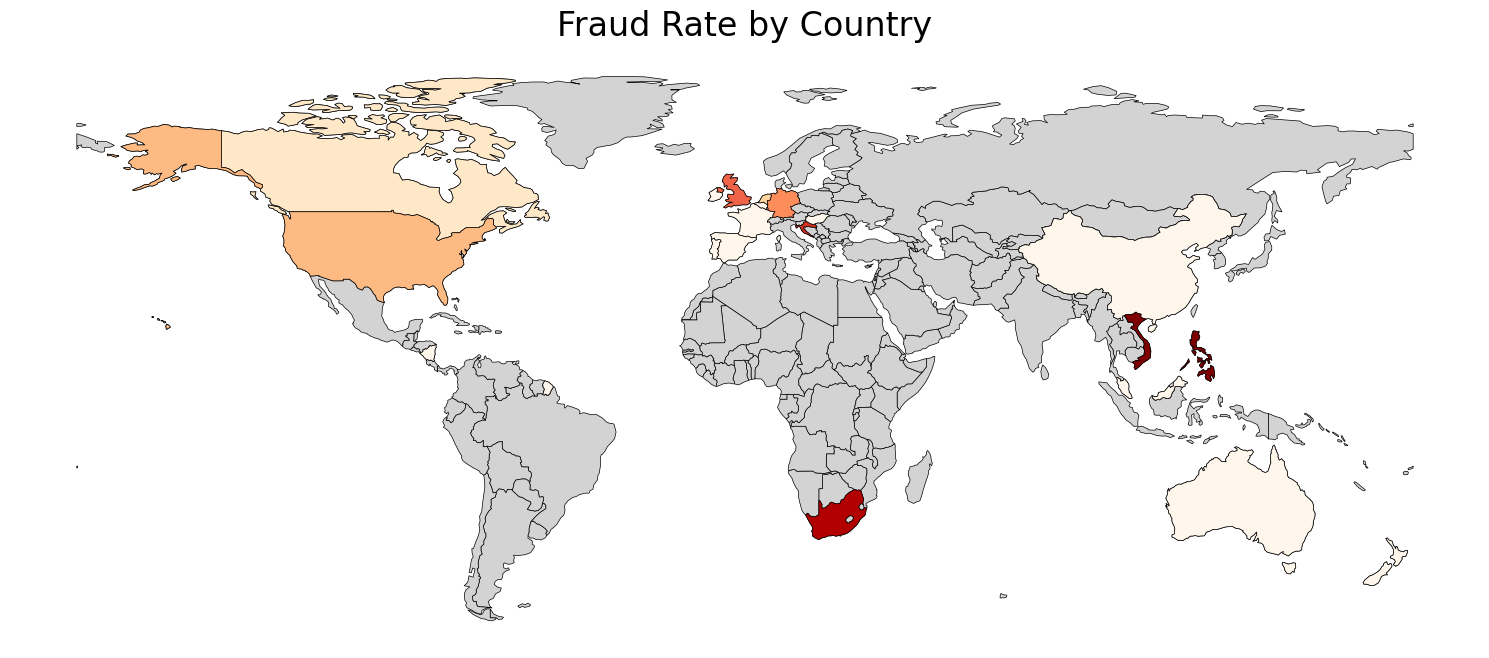

In [23]:
fig, ax = plt.subplots(figsize=(15, 20))
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
agg_df[agg_df['count'] > 1].plot(ax=ax, column = 'pct_fraud', cmap='OrRd',
                                     scheme='natural_breaks', legend=False, k=10,
                                     edgecolor='black', linewidth=0.5)
ax.set_title('Fraud Rate by Country', fontsize=24, pad=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.patch.set_facecolor('white')
#plt.savefig(f'../images/fraud_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

### Fraud Rate by Country

In [24]:
agg_df = agg_df.reset_index()

In [25]:
agg_df['non_fraud_count'] = agg_df['count'] - agg_df['is_fraud_count']

In [26]:
agg_df

,name,geometry,count,is_fraud_count,continent,iso_a3,pct_fraud,non_fraud_count
0,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",1,0,Asia,AFG,0.000000,1
1,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",1,0,Europe,ALB,0.000000,1
2,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",1,0,Africa,DZA,0.000000,1
3,Angola,"MULTIPOLYGON (((12.73517 -5.96568, 13.02487 -5...",1,0,Africa,AGO,0.000000,1
4,Argentina,"MULTIPOLYGON (((-68.25000 -53.10000, -67.75000...",1,0,South America,ARG,0.000000,1
5,Armenia,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",1,0,Asia,ARM,0.000000,1
6,Australia,"MULTIPOLYGON (((119.89370 -33.97607, 119.29890...",331,0,OceaniaOceaniaOceaniaOceaniaOceaniaOceaniaOcea...,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,0.000000,331
7,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",1,0,Europe,AUT,0.000000,1
8,Azerbaijan,"MULTIPOLYGON (((45.45772 38.87414, 44.95269 39...",1,0,Asia,AZE,0.000000,1
9,Bahamas,"MULTIPOLYGON (((-77.89000 25.17000, -77.54000 ...",1,0,North America,BHS,0.000000,1


In [27]:
overall = agg_df.drop(columns='geometry').agg(['sum'])
overall['name'] = 'World'
overall['pct_fraud'] = overall['is_fraud_count'] / overall['count']

In [28]:
overall

,name,count,is_fraud_count,continent,iso_a3,pct_fraud,non_fraud_count
sum,World,7698,570,AsiaEuropeAfricaAfricaSouth AmericaAsiaOceania...,AFGALBDZAAGOARGARMAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,0.074045,7128


In [29]:
other_countries = agg_df[~agg_df['name'].isin(['United States of America',
                                                      'United Kingdom',
                                                      'Australia',
                                                      'Canada'])].drop(columns='geometry').agg('sum')
other_countries['name'] = 'Other Countries'
other_countries['pct_fraud'] = other_countries['is_fraud_count'] / other_countries['count']

In [30]:
other_countries

name                                                 Other Countries
count                                                            309
is_fraud_count                                                    26
continent          AsiaEuropeAfricaAfricaSouth AmericaAsiaEuropeA...
iso_a3             AFGALBDZAAGOARGARMAUTAZEBHSBGDBLRBELBELBELBELB...
pct_fraud                                                   0.084142
non_fraud_count                                                  283
dtype: object

In [31]:
import pandas as pd
full_df = pd.concat([agg_df, overall, other_countries.to_frame().T], ignore_index=True)

In [32]:
full_df.sort_values('count', ascending=False)

,name,geometry,count,is_fraud_count,continent,iso_a3,pct_fraud,non_fraud_count
176,World,None,7698,570,AsiaEuropeAfricaAfricaSouth AmericaAsiaOceania...,AFGALBDZAAGOARGARMAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,0.074045,7128
165,United States of America,"MULTIPOLYGON (((-168.68944 63.29751, -168.7719...",5191,356,North AmericaNorth AmericaNorth AmericaNorth A...,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...,0.06858,4835
164,United Kingdom,"MULTIPOLYGON (((-7.57217 55.13162, -6.73385 55...",1158,167,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,GBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRGBRG...,0.144214,991
26,Canada,"MULTIPOLYGON (((-131.57783 52.18237, -132.1804...",709,21,North AmericaNorth AmericaNorth AmericaNorth A...,CANCANCANCANCANCANCANCANCANCANCANCANCANCANCANC...,0.029619,688
6,Australia,"MULTIPOLYGON (((119.89370 -33.97607, 119.29890...",331,0,OceaniaOceaniaOceaniaOceaniaOceaniaOceaniaOcea...,AUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSA...,0.0,331
177,Other Countries,None,309,26,AsiaEuropeAfricaAfricaSouth AmericaAsiaEuropeA...,AFGALBDZAAGOARGARMAUTAZEBHSBGDBLRBELBELBELBELB...,0.084142,283
110,New Zealand,"MULTIPOLYGON (((172.09723 -40.95610, 172.79858...",21,0,OceaniaOceaniaOceaniaOceaniaOceaniaOceaniaOcea...,NZLNZLNZLNZLNZLNZLNZLNZLNZLNZLNZLNZLNZLNZLNZLN...,0.0,21
54,France,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",21,0,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,FRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAFRAF...,0.0,21
74,Ireland,"POLYGON ((-9.97709 51.82045, -9.16628 52.86463...",20,0,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,IRLIRLIRLIRLIRLIRLIRLIRLIRLIRLIRLIRLIRLIRLIRLI...,0.0,20
58,Germany,"POLYGON ((14.68503 52.08995, 14.60710 51.74519...",18,2,EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...,DEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUDEUD...,0.111111,16


In [33]:
def fraud_by_country(df):
    for country in df['country'].value_counts().index.tolist():
        total_events = df[df['country'] == country].is_fraud.value_counts().sum()
        non_fraud_count = df[df['country'] == country].is_fraud.value_counts().get('Not Fraud', default=0)
        fraud_count = df[df['country'] == country].is_fraud.value_counts().get('Fraud', default=0)
        pct_non_fraud = round(non_fraud_count / total_events * 100) 
        pct_fraud = round(fraud_count / total_events * 100)
        print(country)
        print(f' Total Events: {total_events}, Not Fraud: {pct_non_fraud}% ({non_fraud_count}) Fraud: {pct_fraud}% ({fraud_count})')

In [34]:
fraud_by_country(gdf)

US
 Total Events: 5771, Not Fraud: 92% (5312) Fraud: 8% (459)
GB
 Total Events: 1226, Not Fraud: 85% (1036) Fraud: 15% (190)
CA
 Total Events: 791, Not Fraud: 94% (742) Fraud: 6% (49)
AU
 Total Events: 358, Not Fraud: 99% (354) Fraud: 1% (4)
Unknown
 Total Events: 125, Not Fraud: 90% (113) Fraud: 10% (12)
None
 Total Events: 62, Not Fraud: 100% (62) Fraud: 0% (0)
NZ
 Total Events: 42, Not Fraud: 67% (28) Fraud: 33% (14)
DE
 Total Events: 21, Not Fraud: 81% (17) Fraud: 19% (4)
IE
 Total Events: 18, Not Fraud: 100% (18) Fraud: 0% (0)
NL
 Total Events: 17, Not Fraud: 88% (15) Fraud: 12% (2)
VN
 Total Events: 17, Not Fraud: 6% (1) Fraud: 94% (16)
FR
 Total Events: 15, Not Fraud: 100% (15) Fraud: 0% (0)
PH
 Total Events: 15, Not Fraud: 0% (0) Fraud: 100% (15)
A1
 Total Events: 12, Not Fraud: 0% (0) Fraud: 100% (12)
BE
 Total Events: 11, Not Fraud: 91% (10) Fraud: 9% (1)
HU
 Total Events: 10, Not Fraud: 100% (10) Fraud: 0% (0)
PR
 Total Events: 9, Not Fraud: 56% (5) Fraud: 44% (4)
ES
 Total 

### Folium Mapping

In [35]:
lng, lat = -73.99190, 40.75362
folium.Map(location=[lat, lng])

## Seaborn Plotting Comparing Fraud vs Not Fraud

In [36]:
def compare_fraud_vs_not_fraud(df, feature, title, save=False):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1 = sns.kdeplot(ax=ax1, data=df, x=feature,
                hue="is_fraud", fill=True, palette=['cornflowerblue', 'lightcoral'],
               common_norm=False)
    ax1.set_title(title, fontsize=24, pad=10)
    ax1.set_xlabel(feature.replace('_', ' ').title(), fontsize=18)
    ax1.set_ylabel('Density', fontsize=18)
    ax1.get_legend().set_title(None)
    plt.setp(ax1.get_legend().get_texts(), fontsize='18')
    for patch in ax1.get_legend().get_patches():
        patch.set_height(12)
    
    fig.tight_layout(pad=0)
    
    if save:
        plt.savefig(f'../images/{feature}_comparison.png', dpi=300,
                    bbox_inches='tight', facecolor='w')

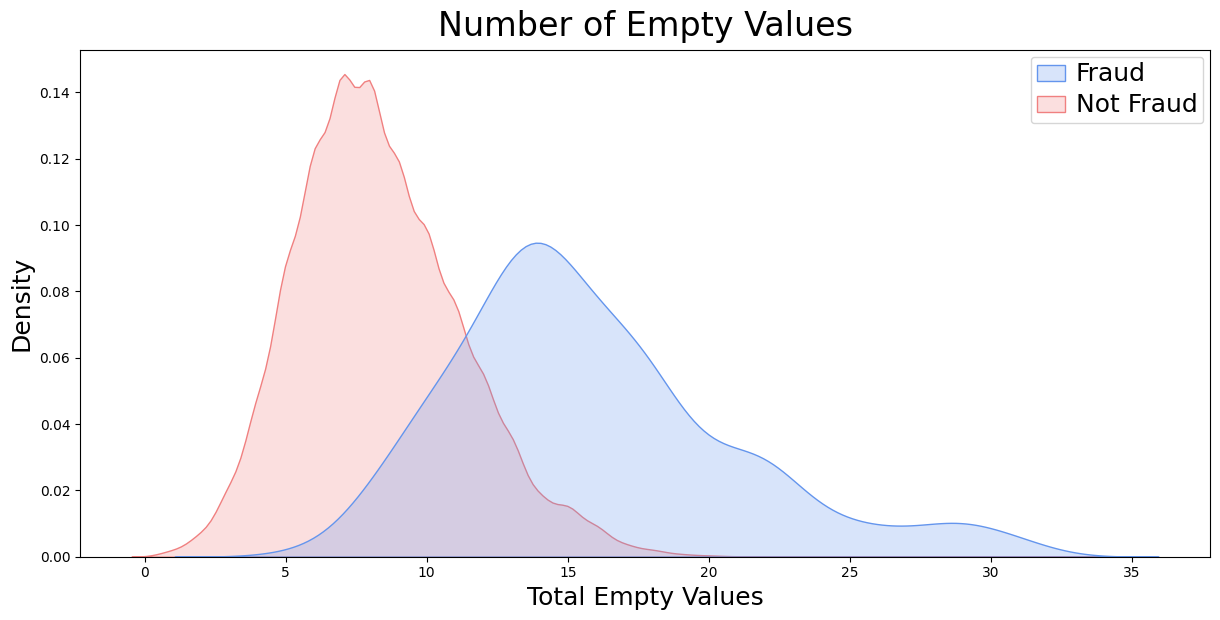

In [37]:
feature = 'total_empty_values'
compare_fraud_vs_not_fraud(df, feature, 'Number of Empty Values', save=False)

/tmp/ipykernel_355535/35656020.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(12, 6))


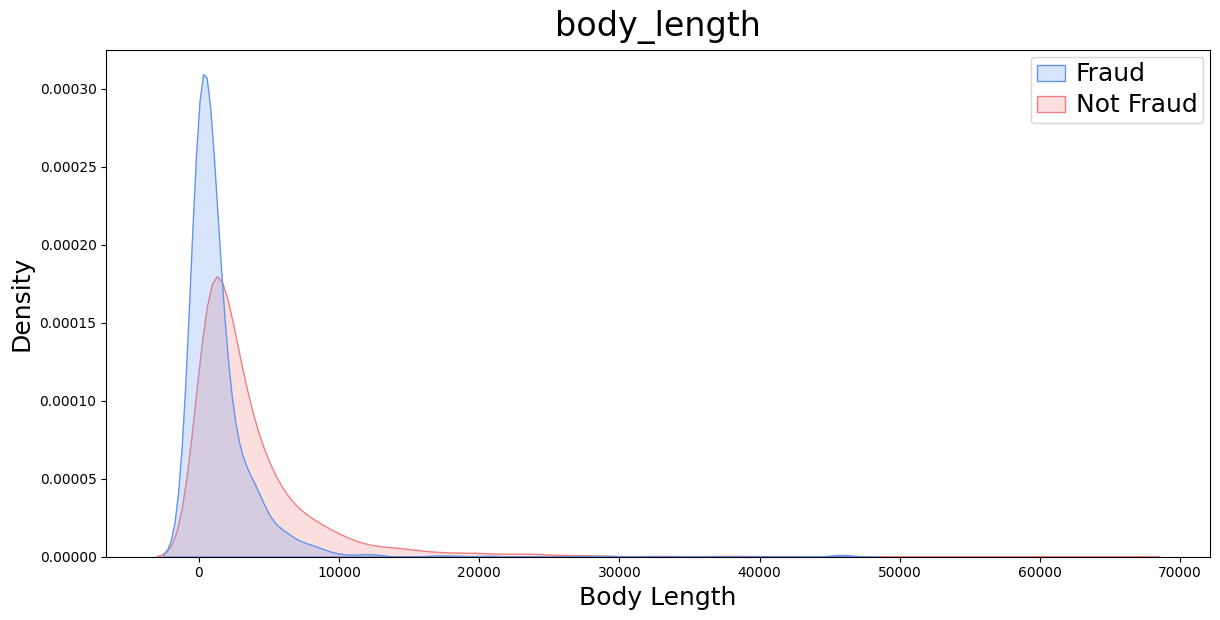

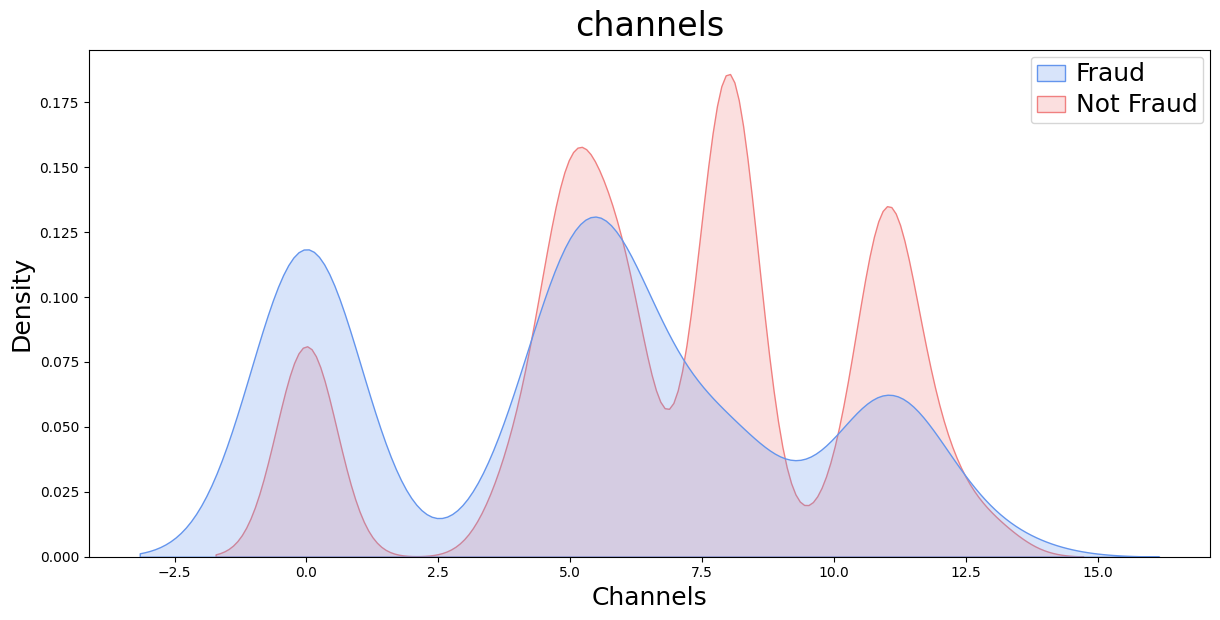

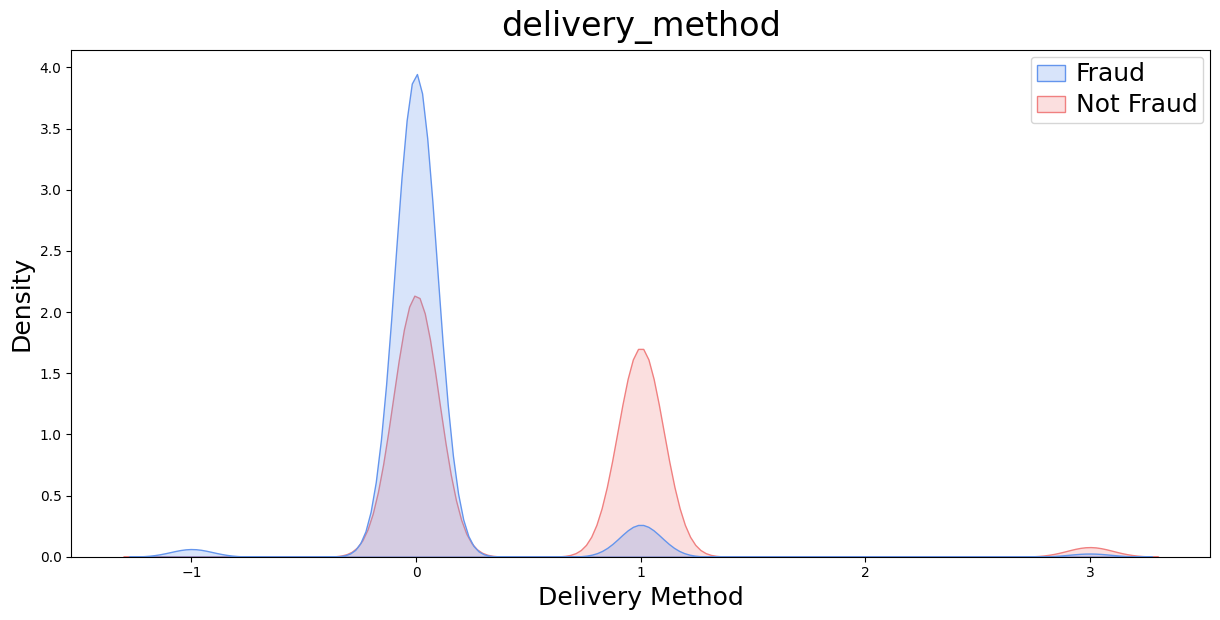

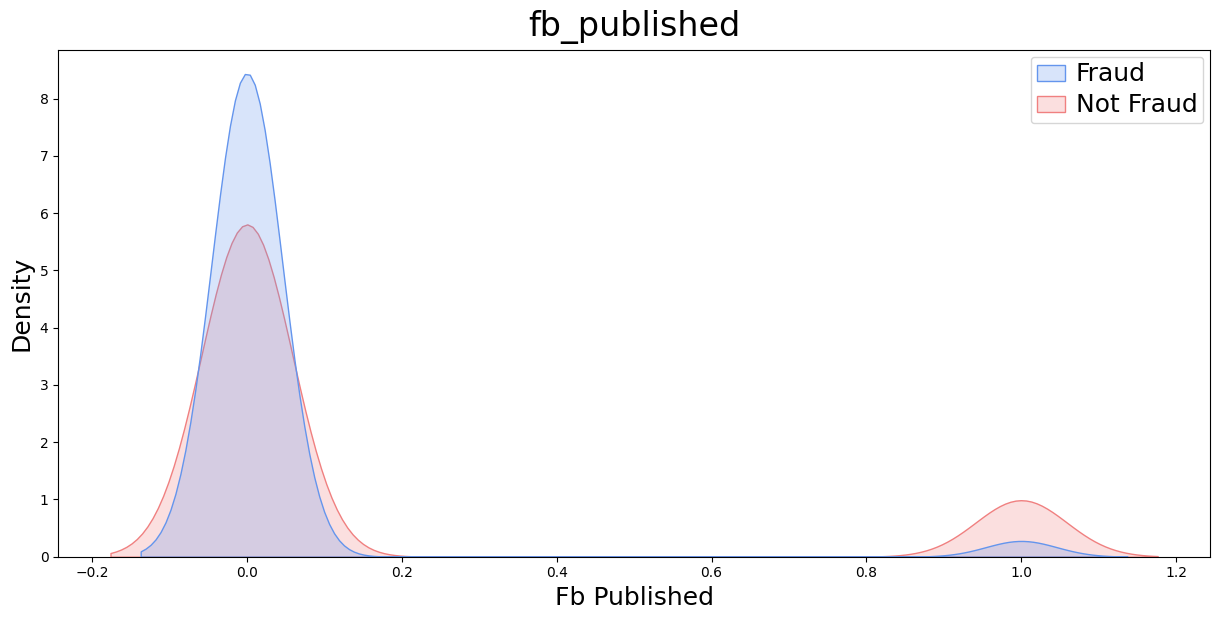

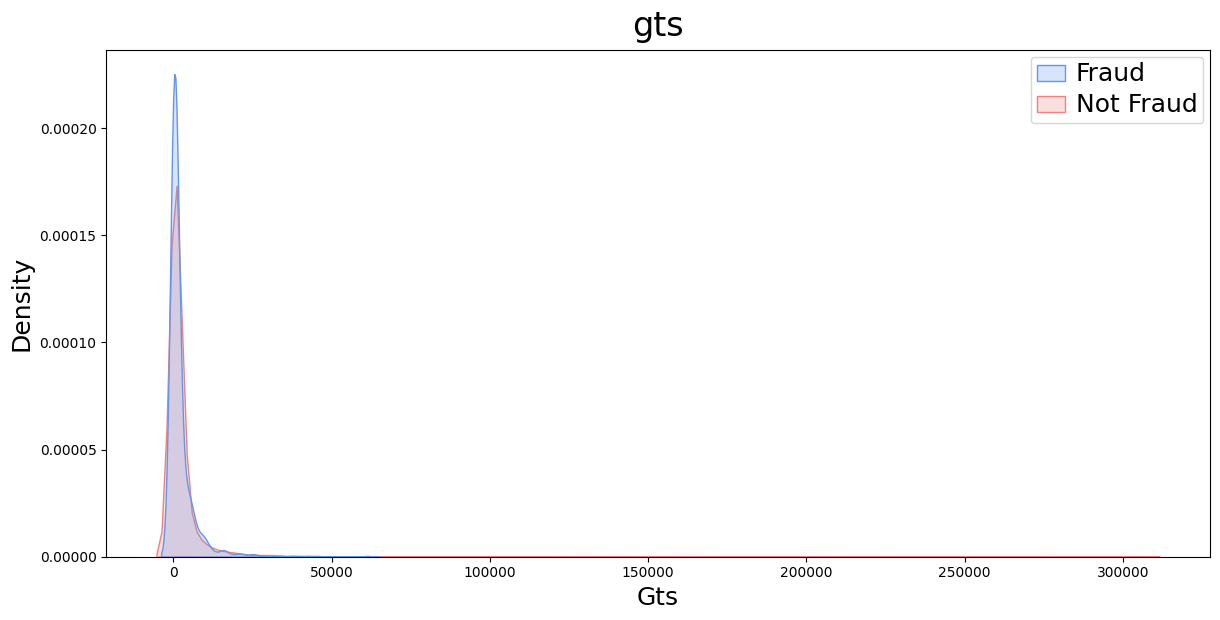

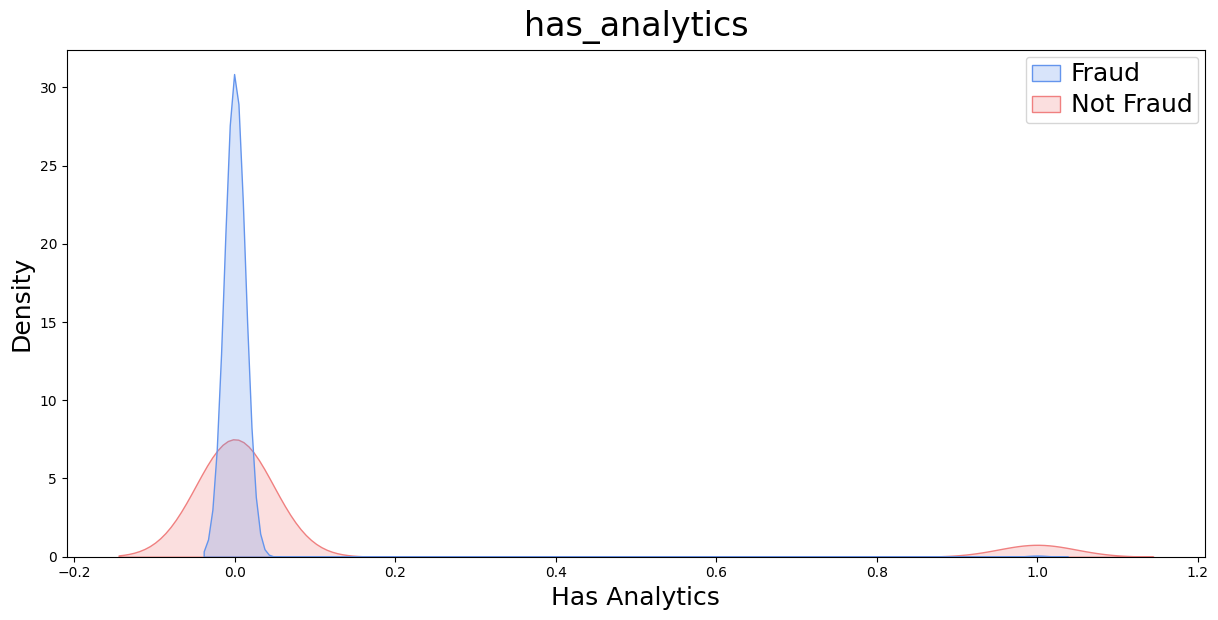

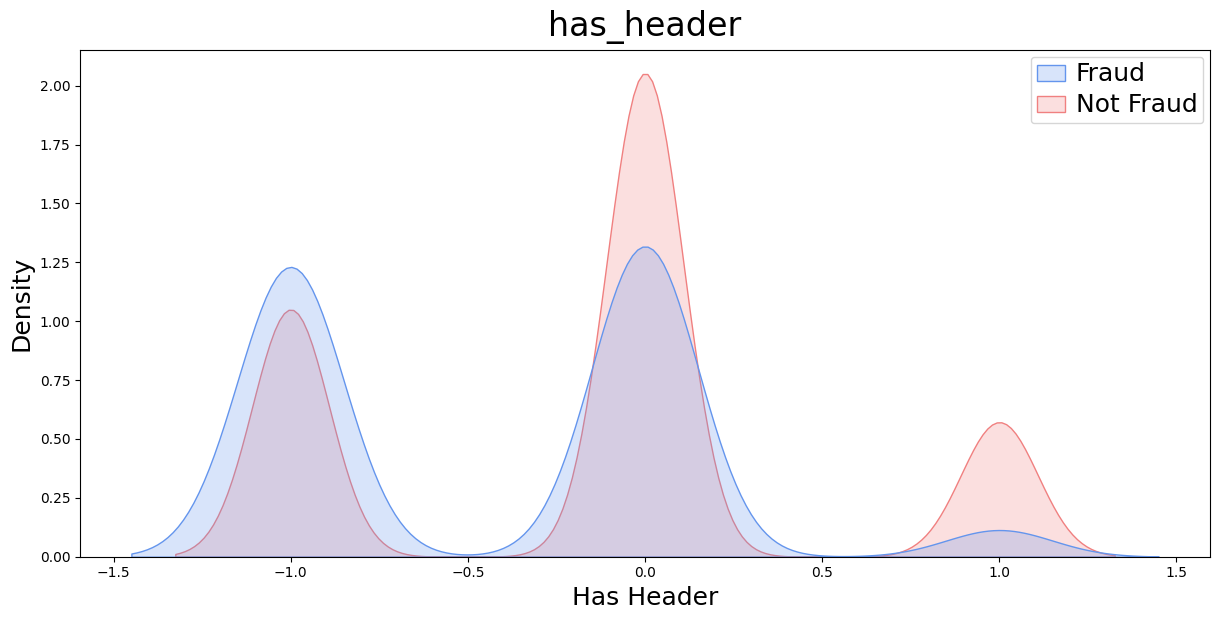

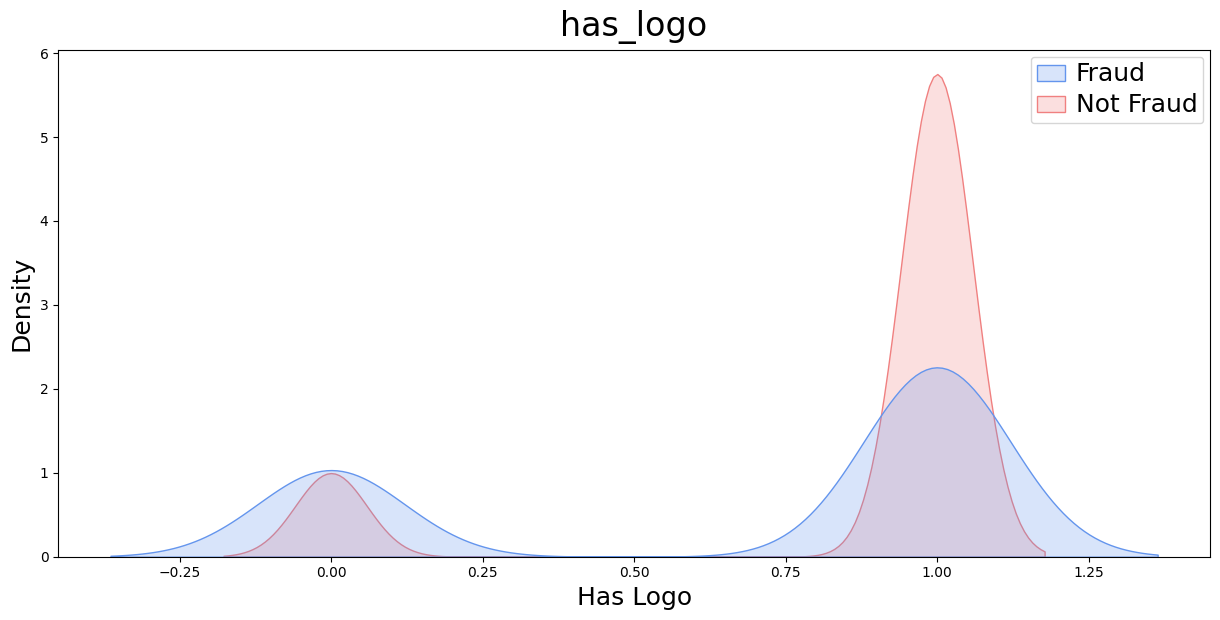

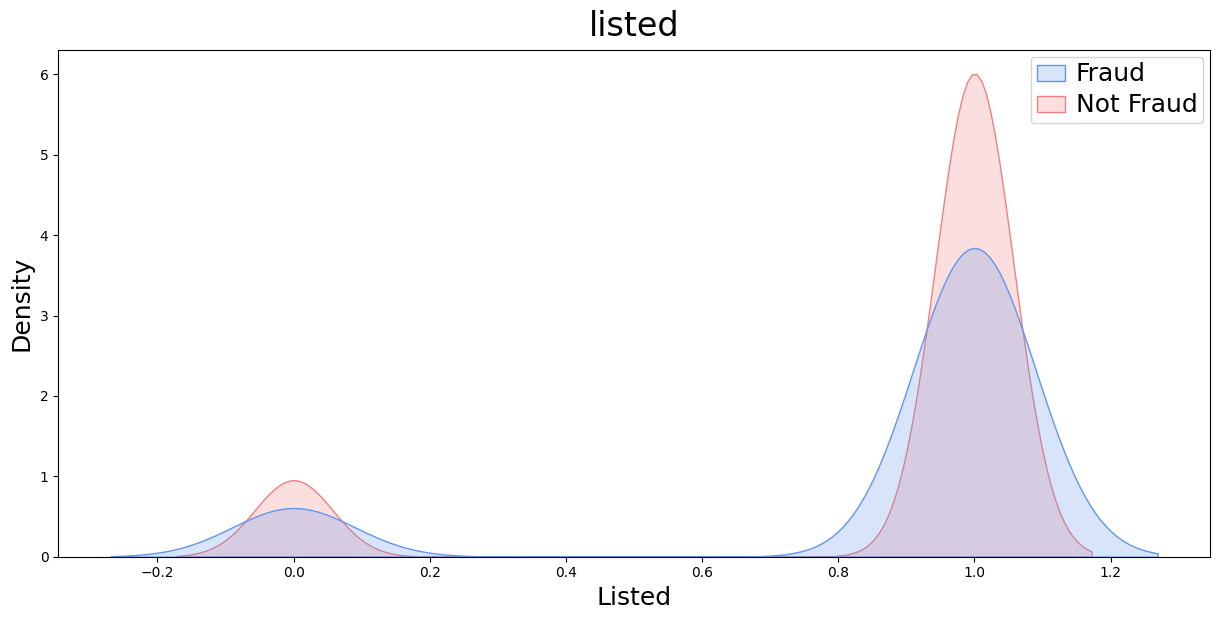

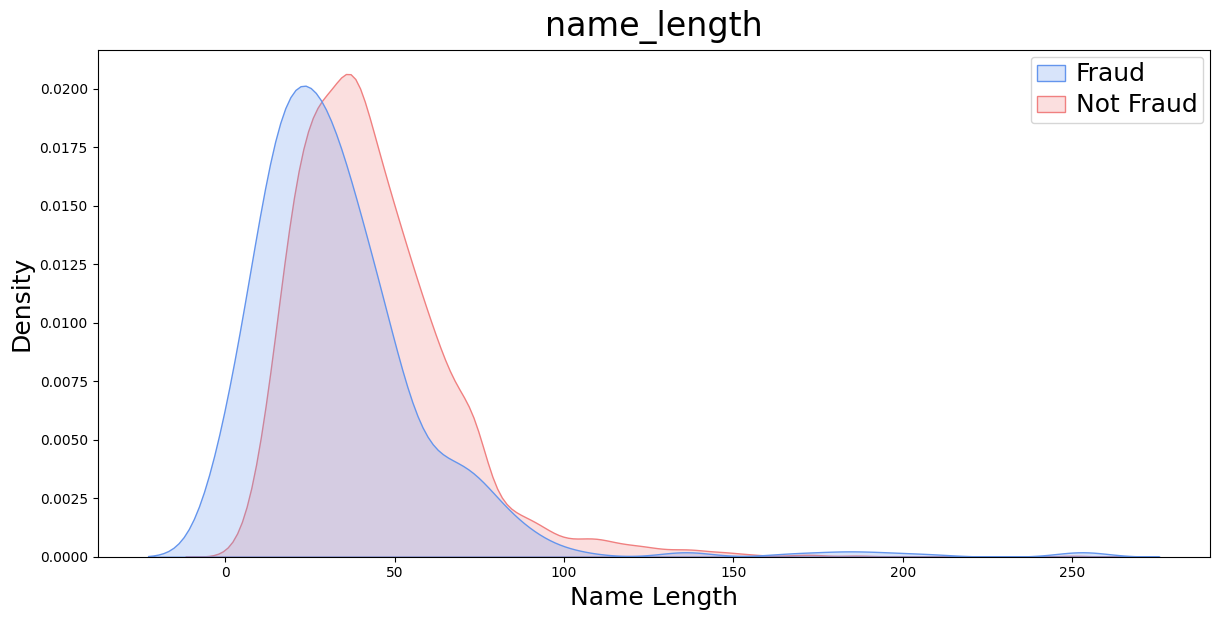

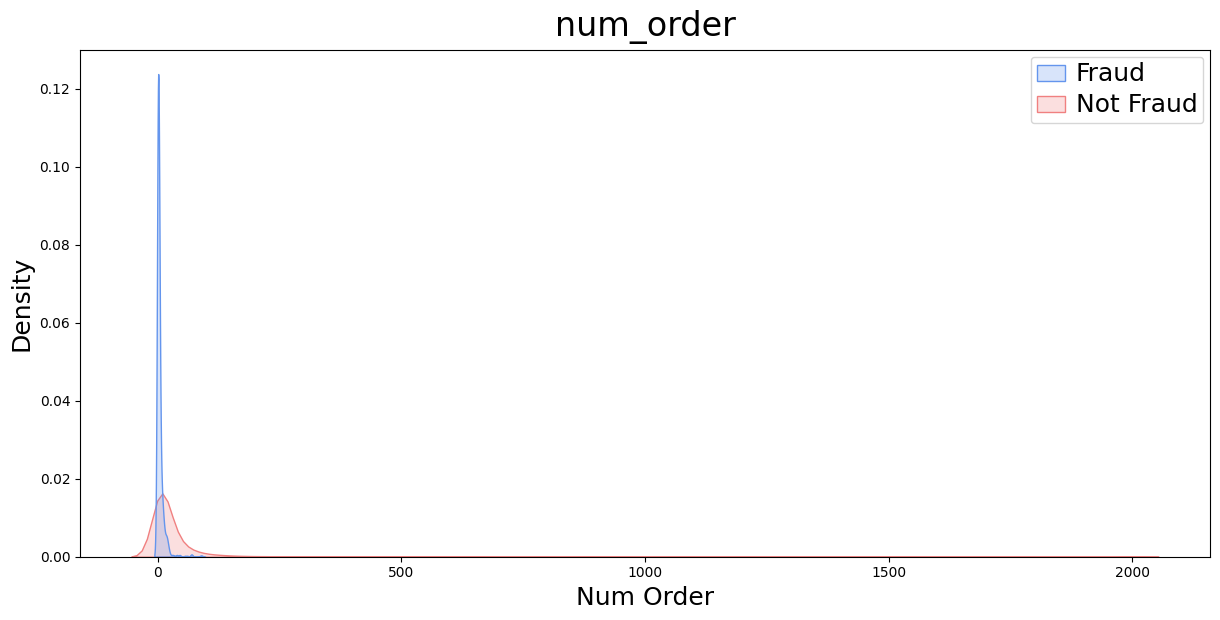

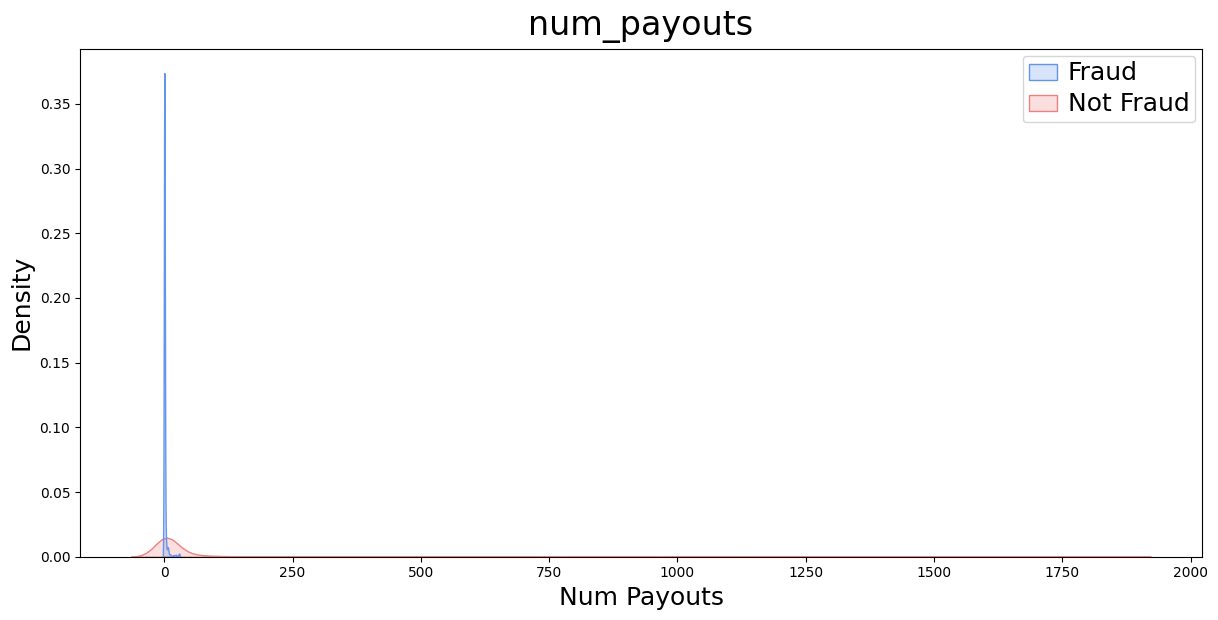

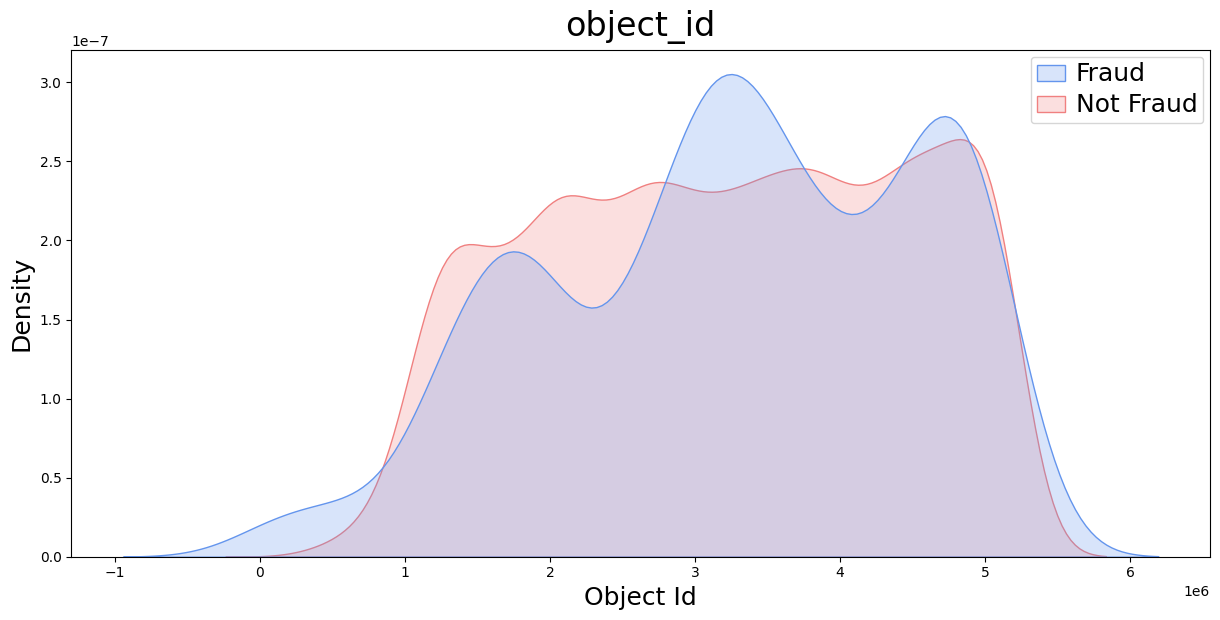

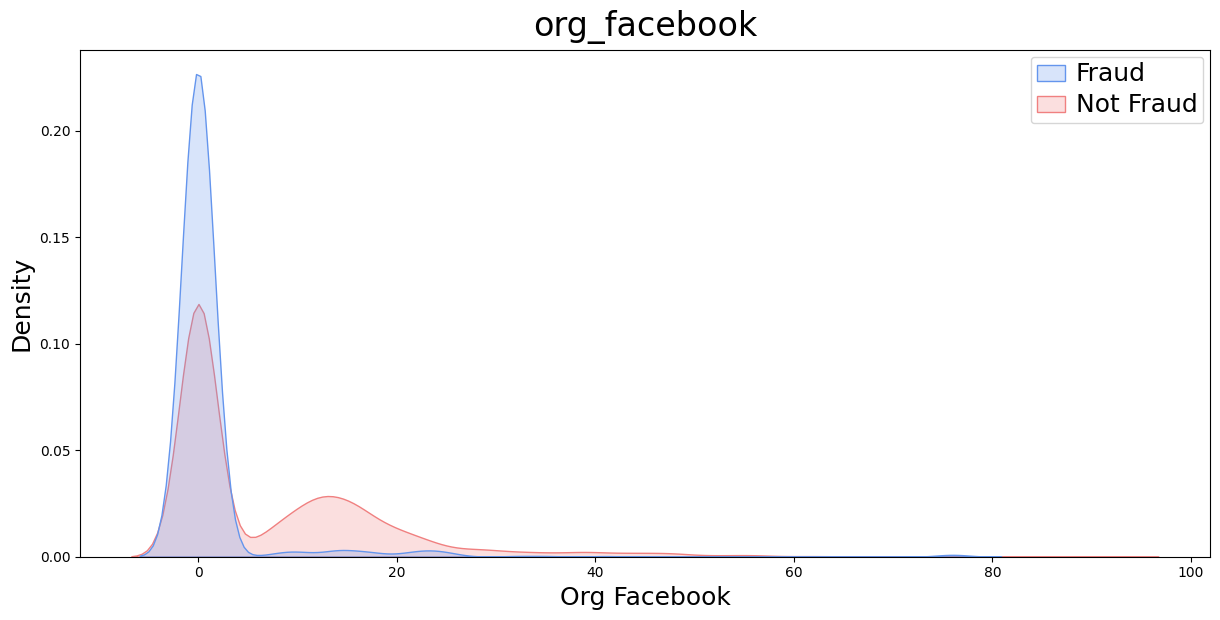

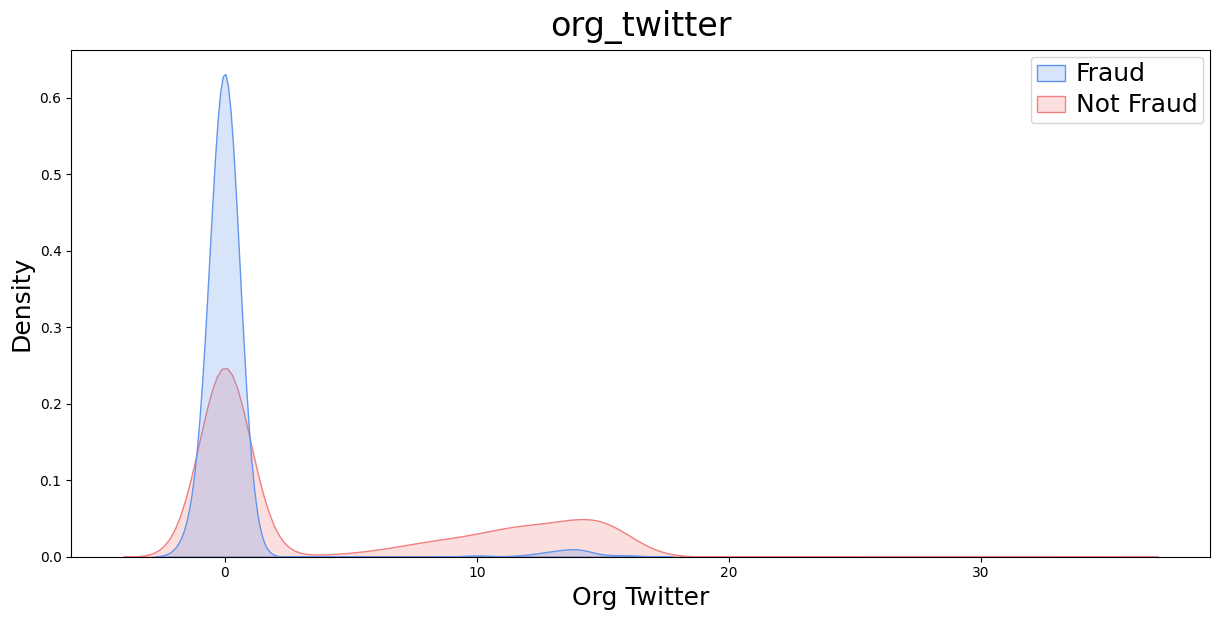

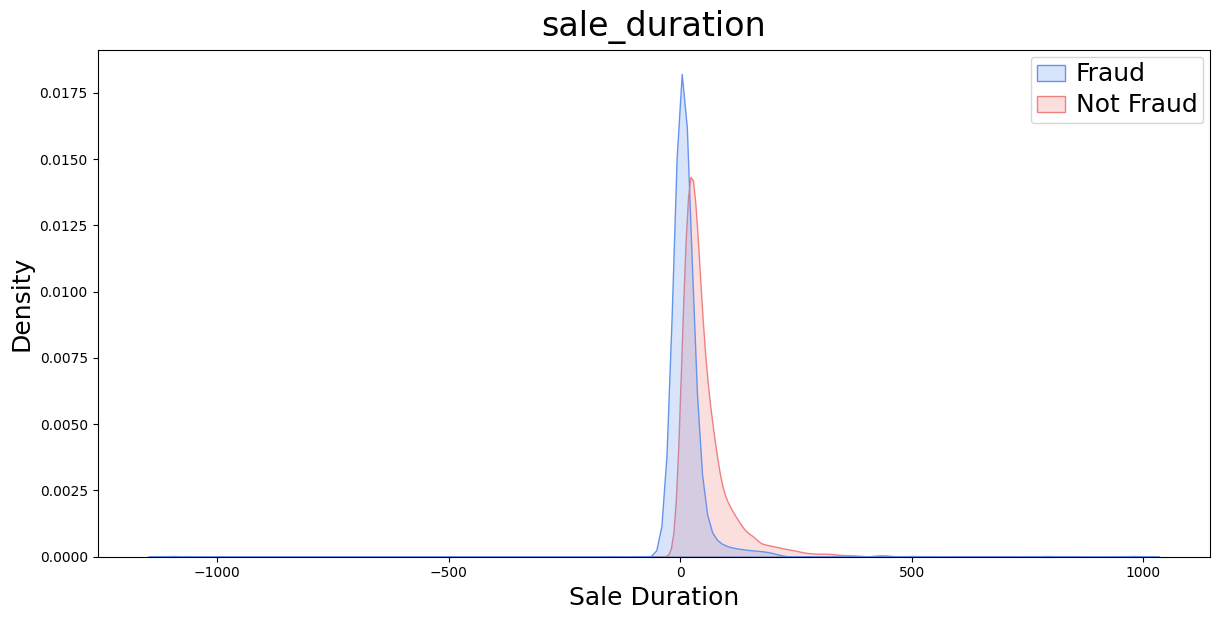

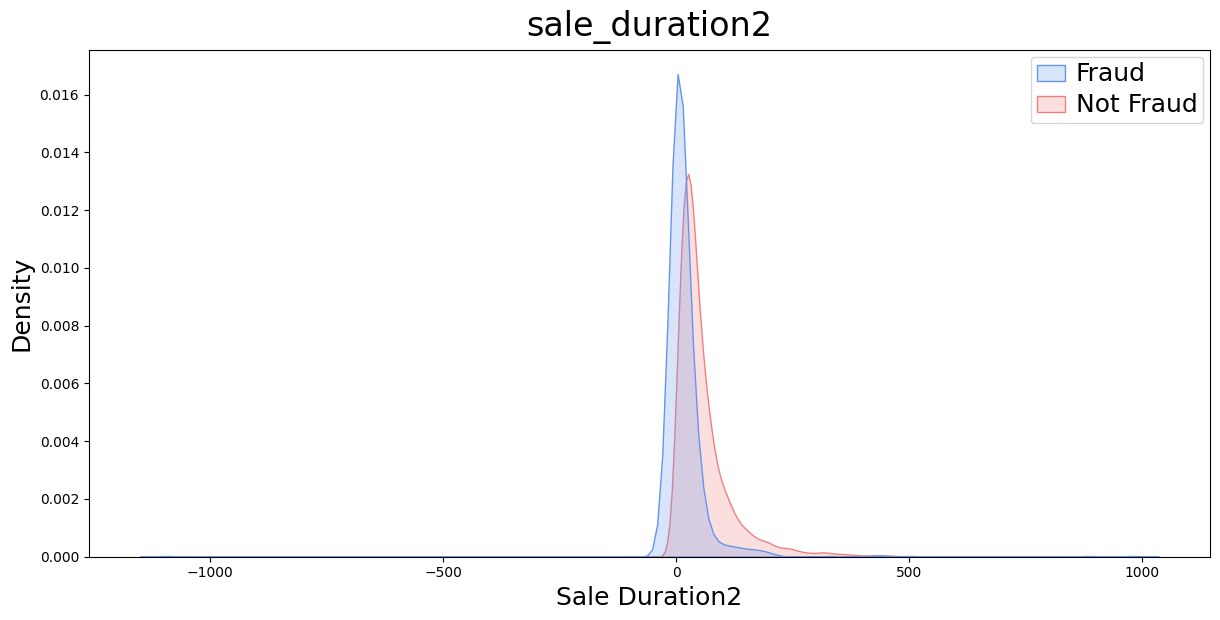

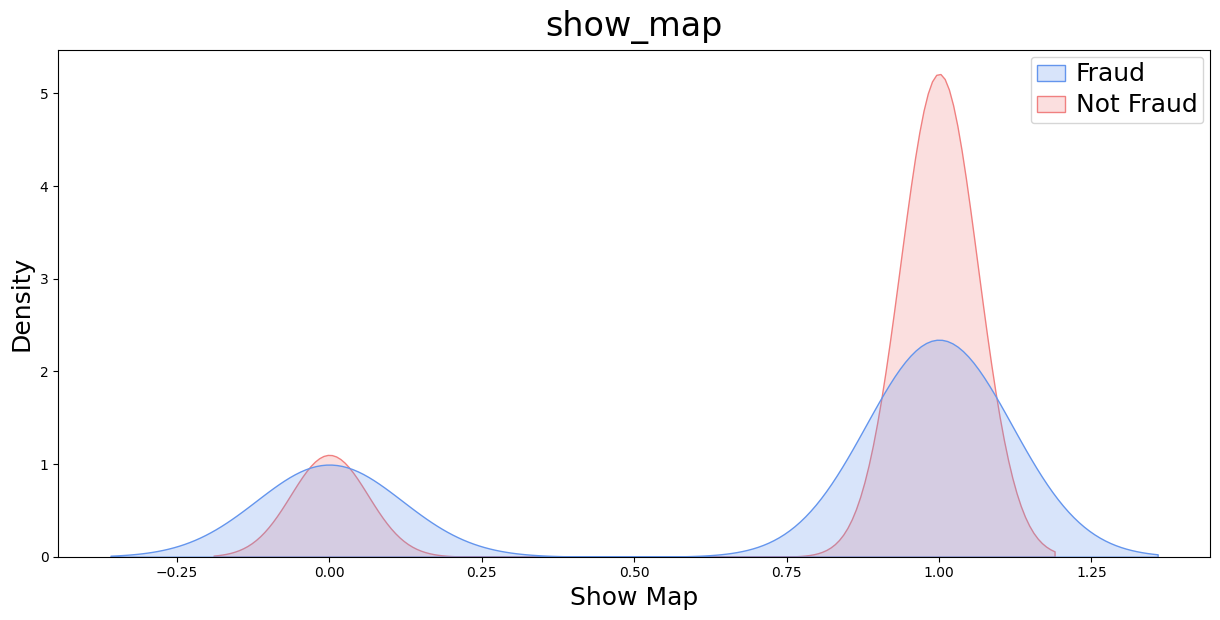

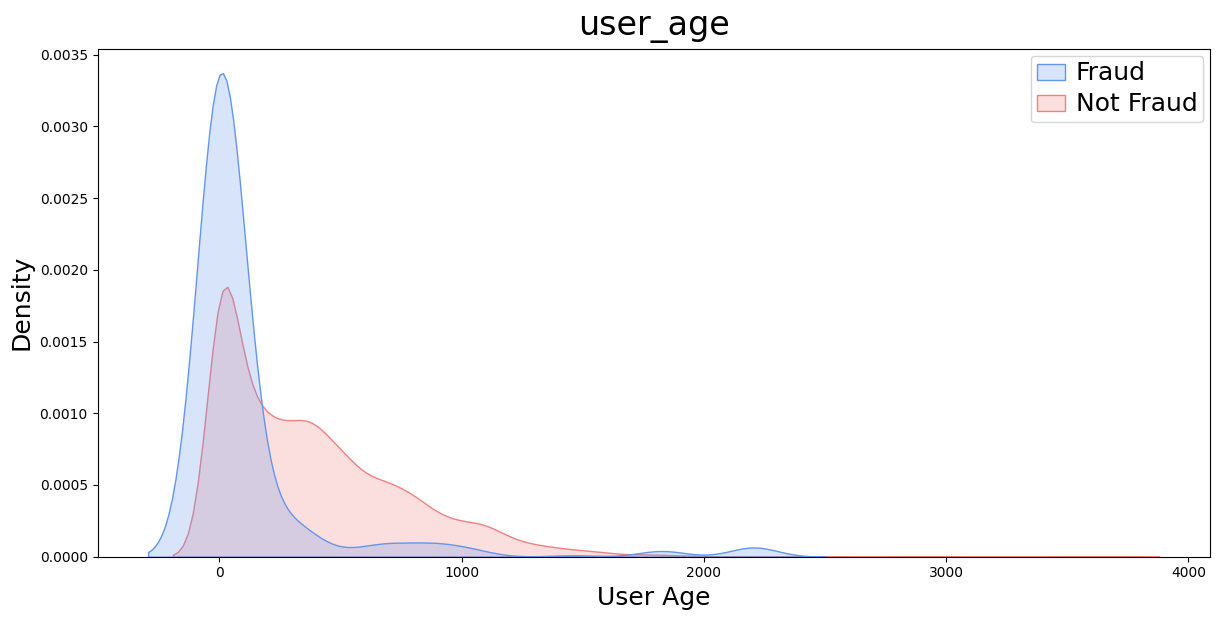

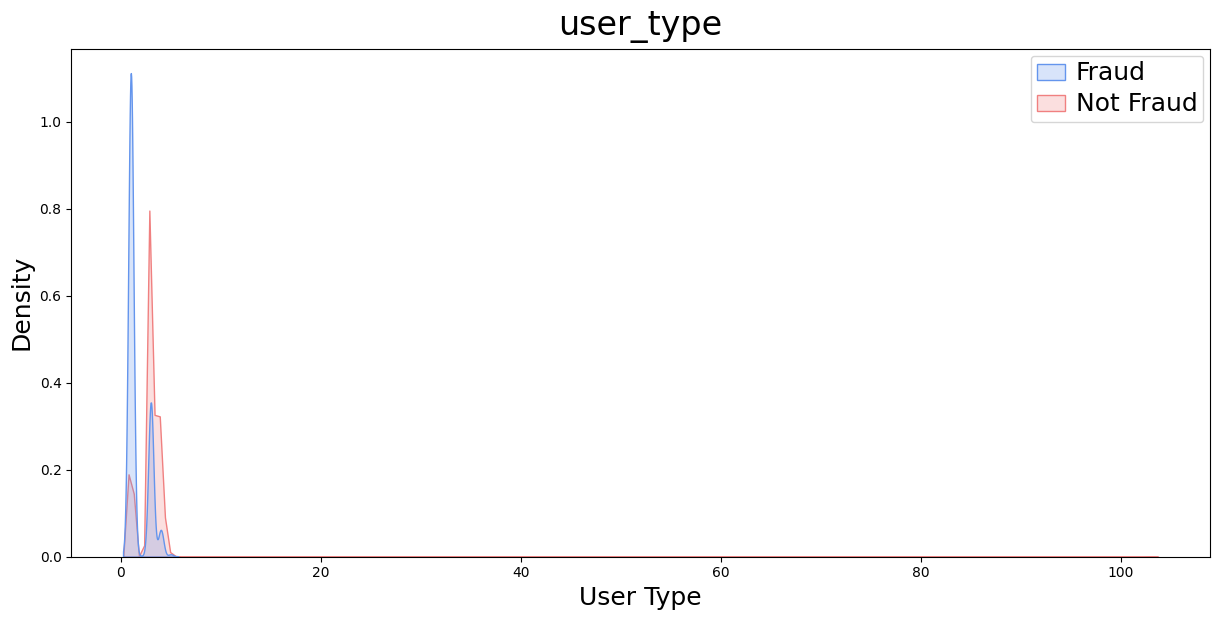

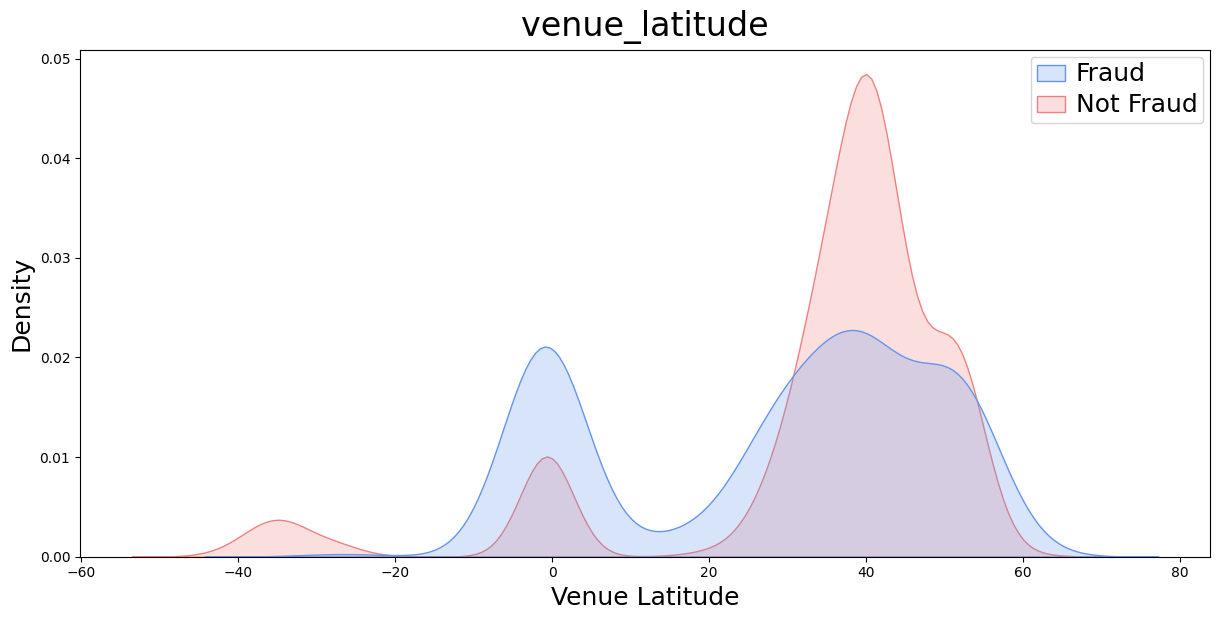

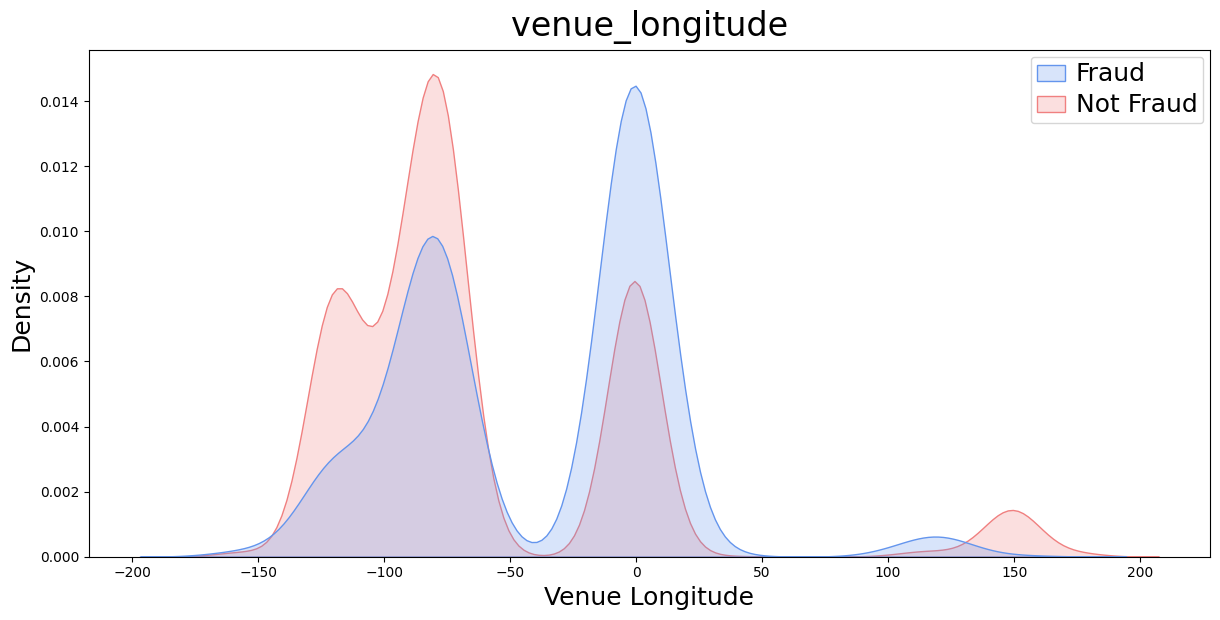

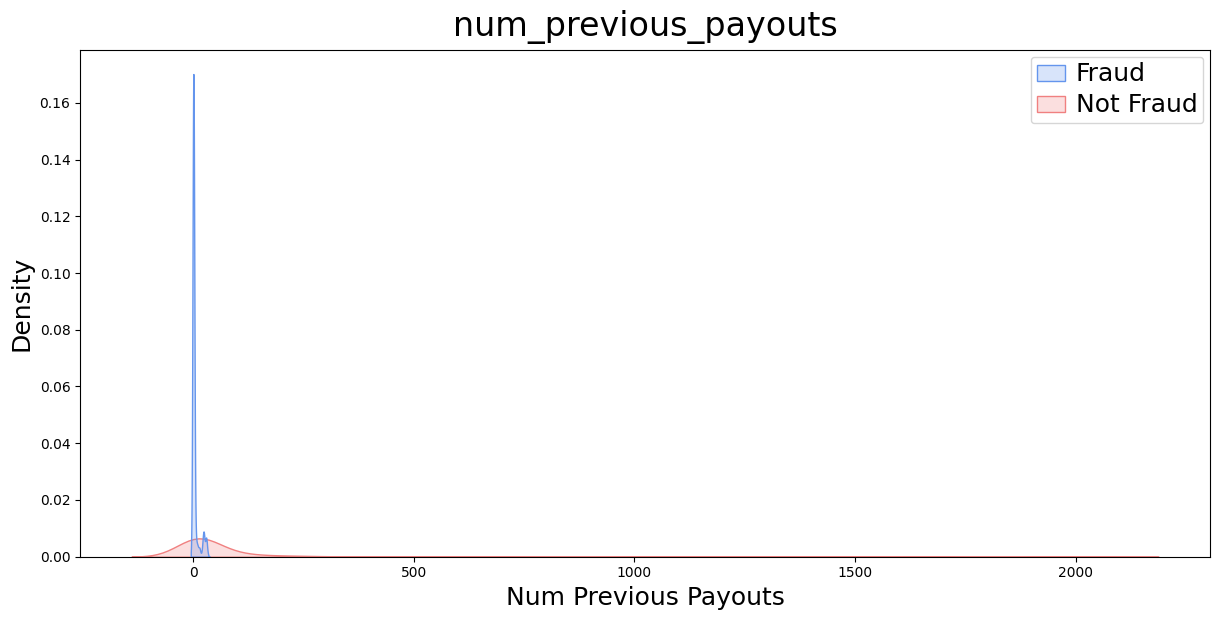

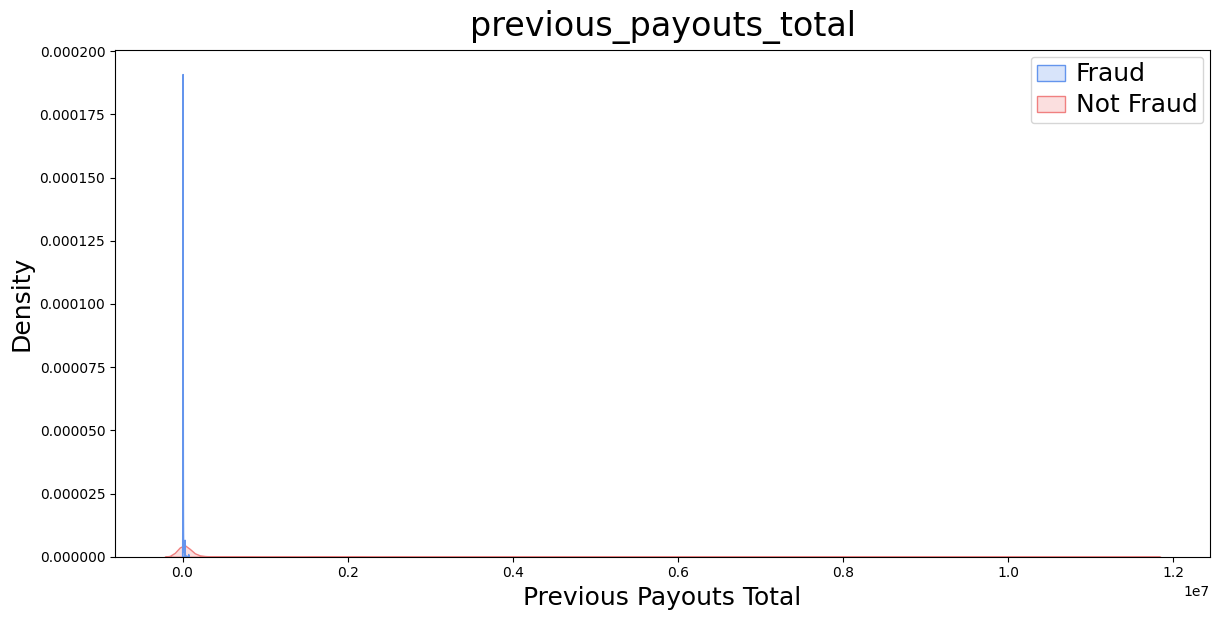

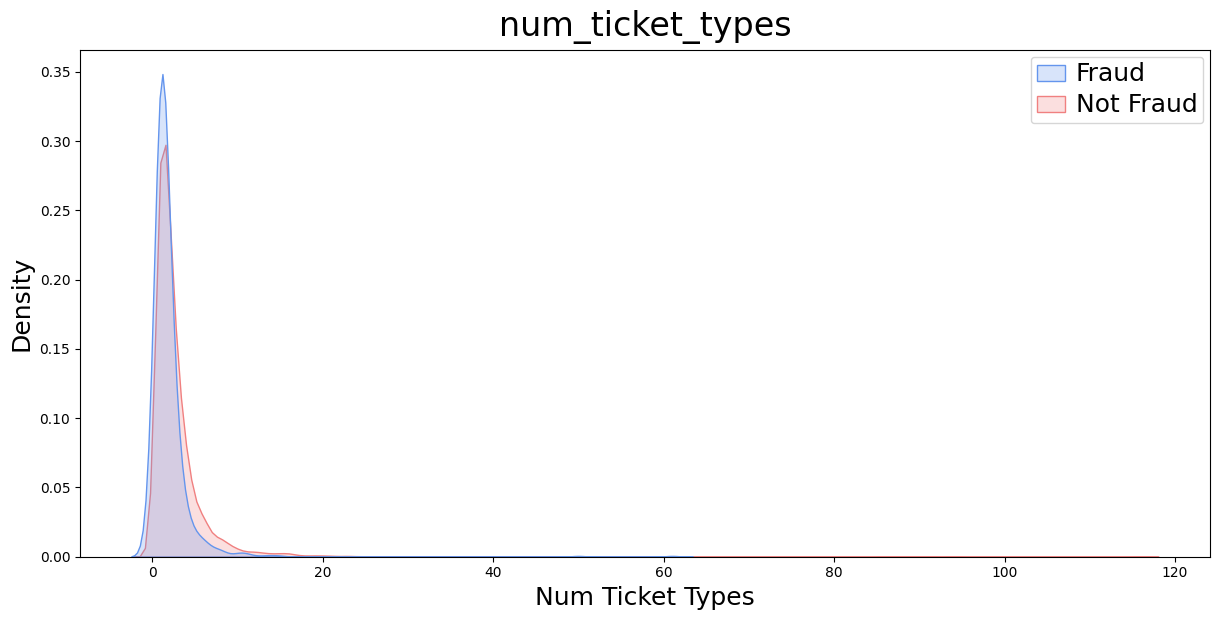

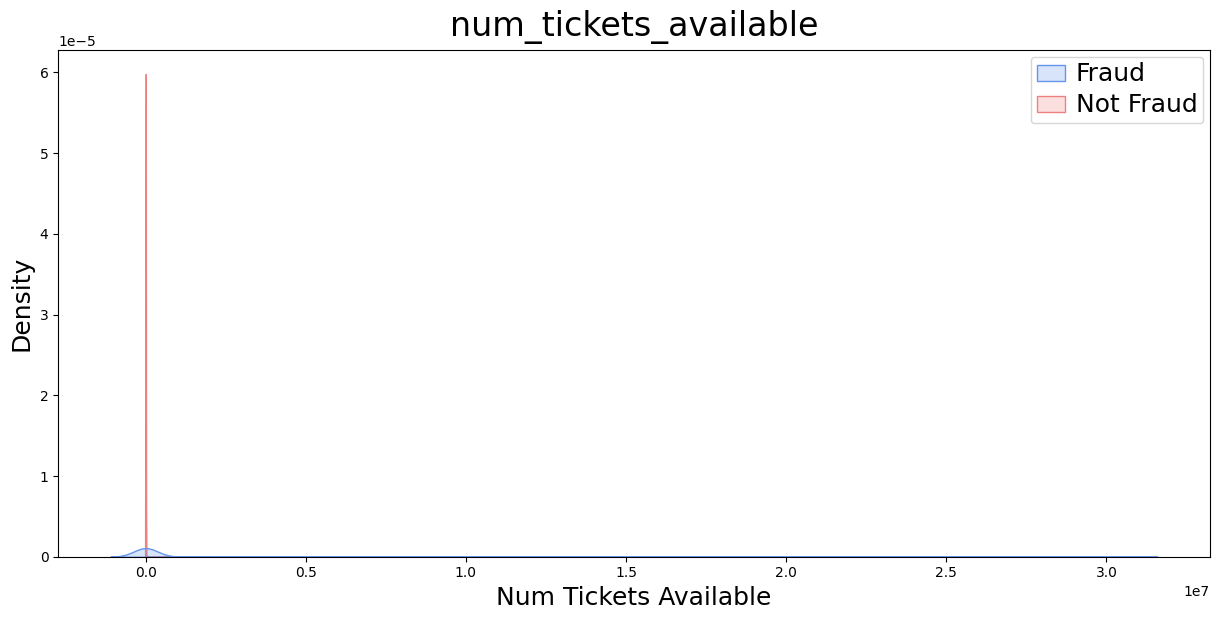

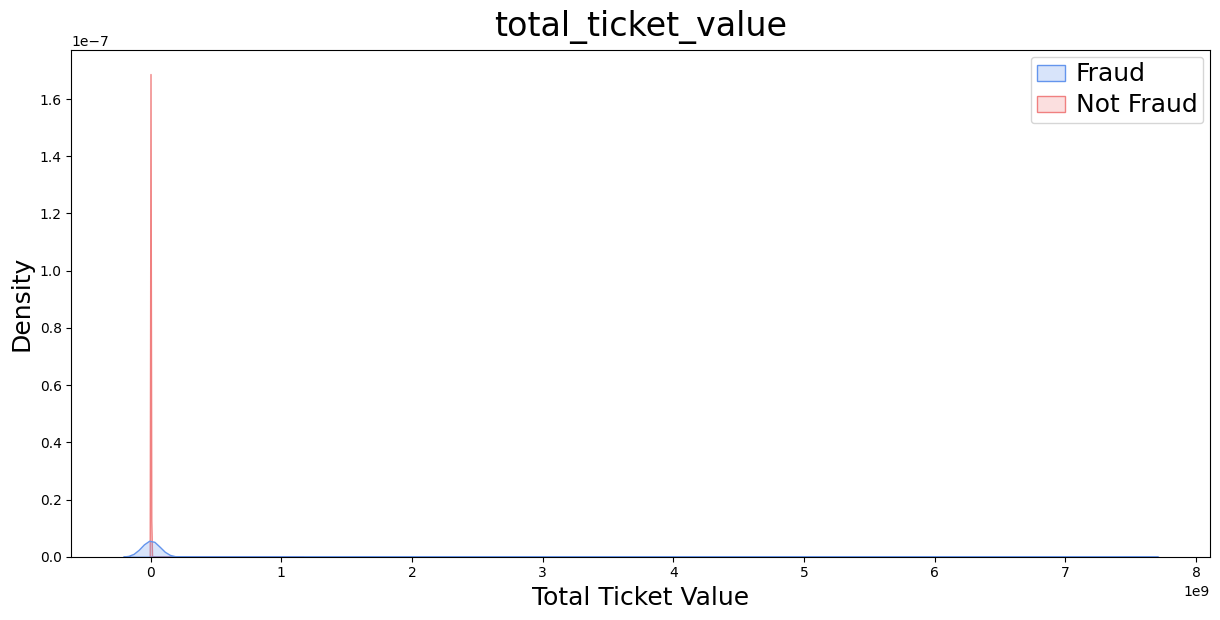

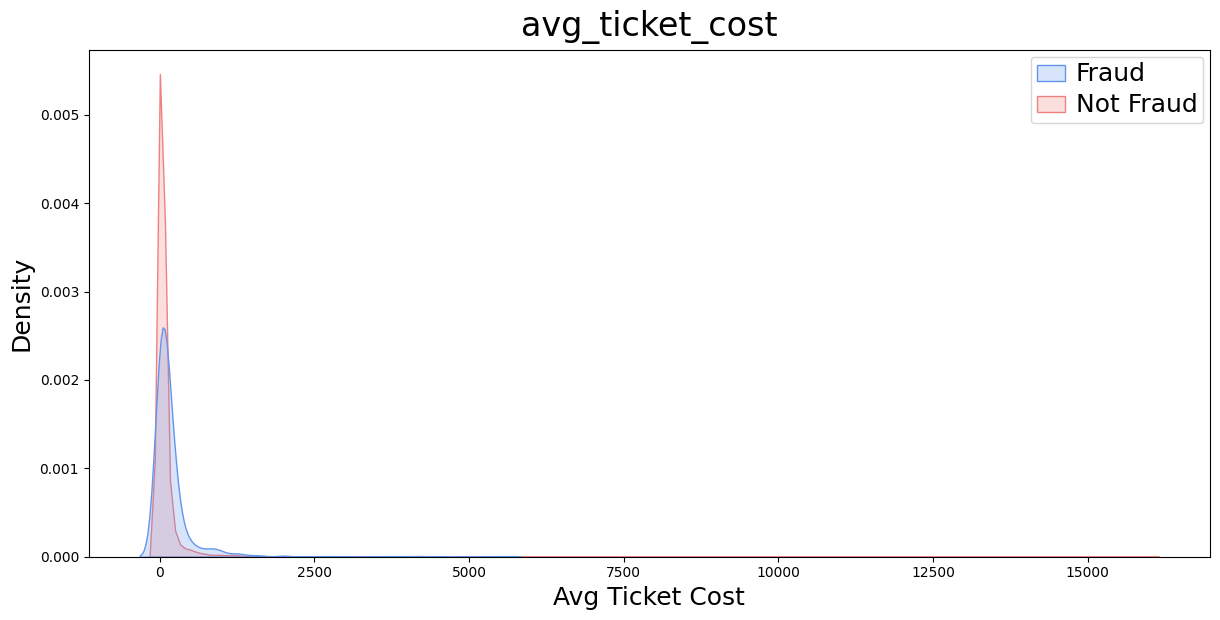

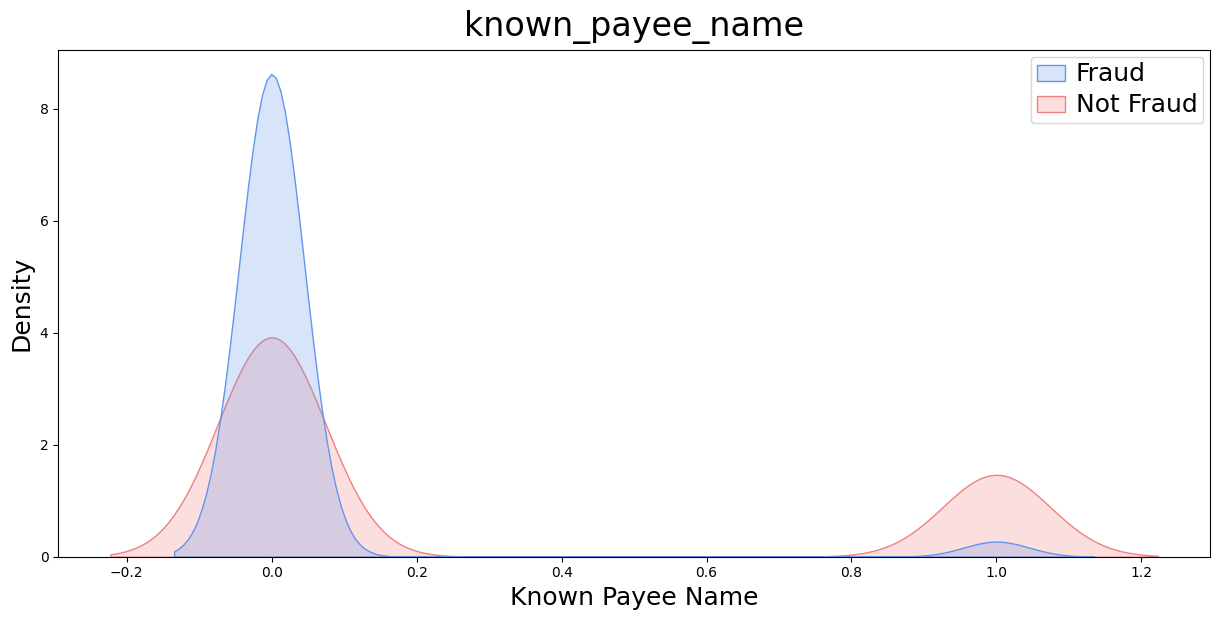

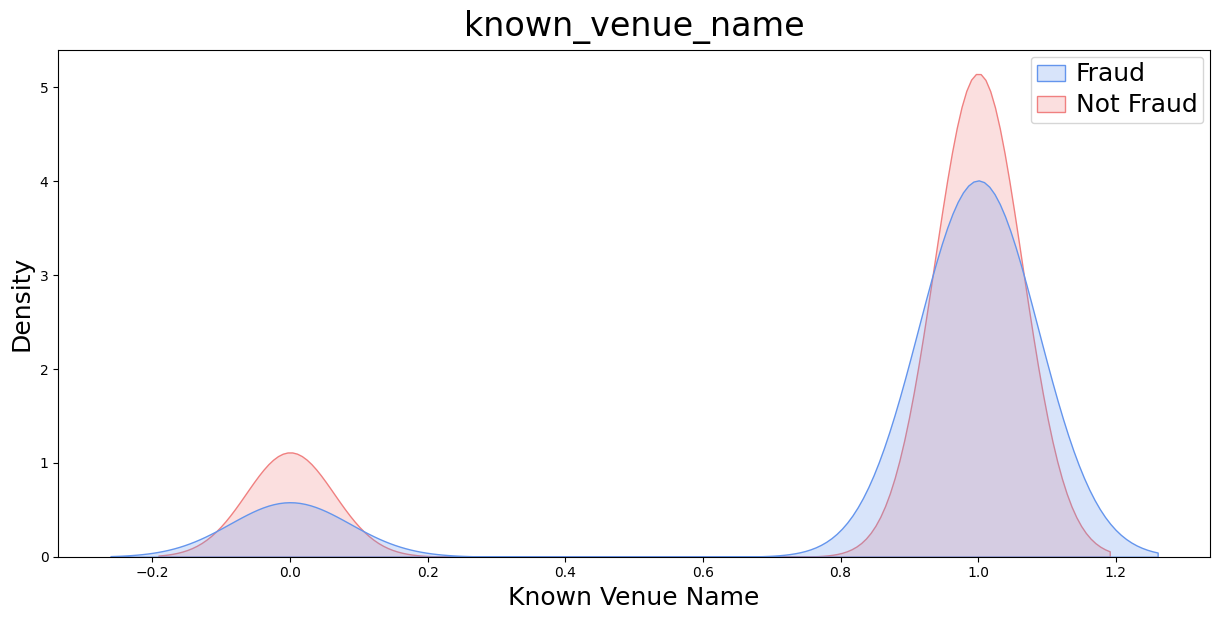

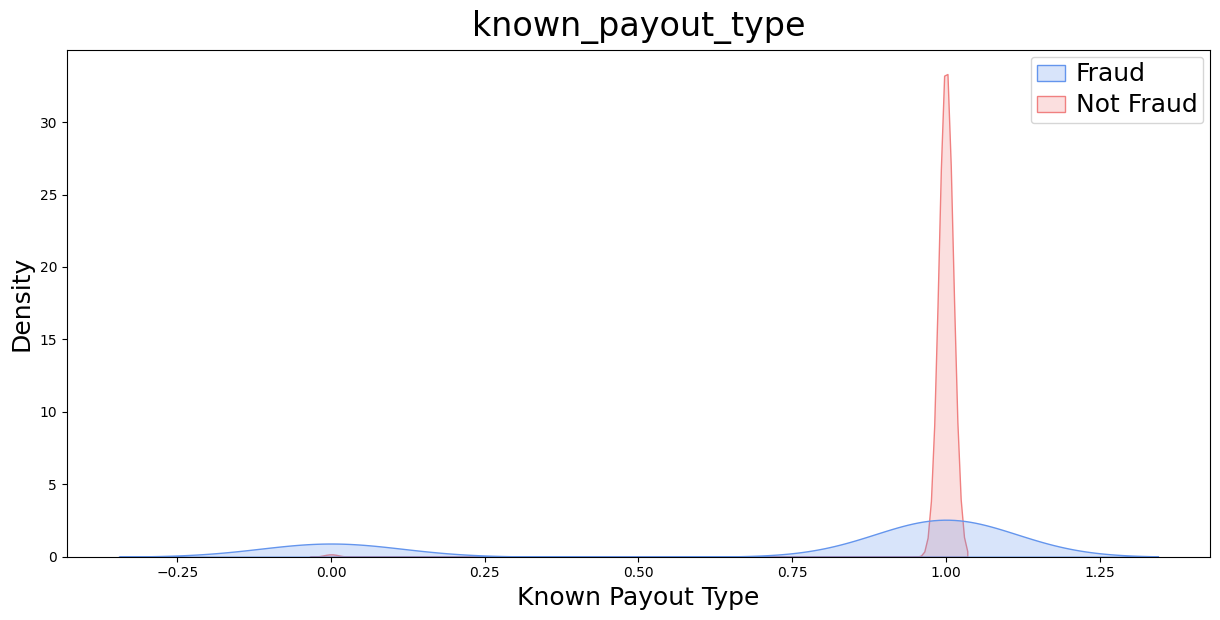

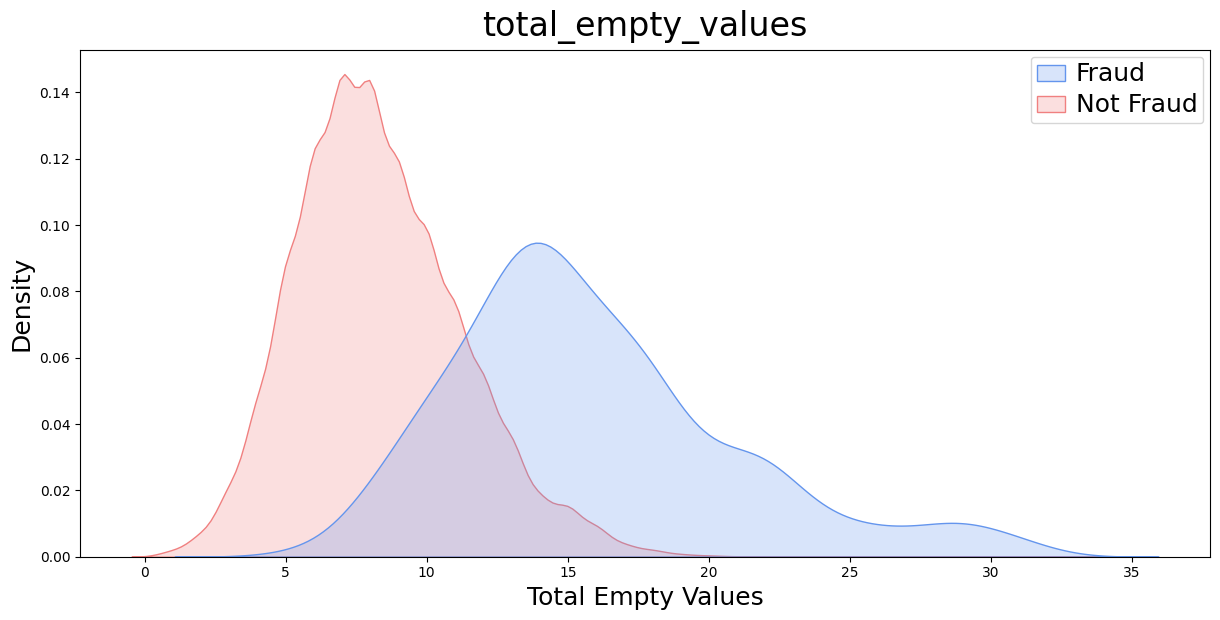

In [38]:
# Only plot numeric columns (kdeplot requires numeric data)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for feature in numeric_cols:
    compare_fraud_vs_not_fraud(df, feature, feature)